# 1)DATA EXTRACTION

In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#importing dataset of zomato
df=pd.read_csv("zomato.csv")

In [3]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.info()

# 2)DATA CLEANING

In [18]:
#dropping unwanted columns from dataset.
df.drop(["url","address","phone","reviews_list","menu_item","location"],inplace=True,axis=1)
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   dish_liked                   23639 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [6]:
df.shape

(51717, 11)

In [7]:
df.duplicated().sum()

124

In [19]:
#dropping duplicate rows from dataset.
df=df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51593 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51593 non-null  object
 1   online_order                 51593 non-null  object
 2   book_table                   51593 non-null  object
 3   rate                         43853 non-null  object
 4   votes                        51593 non-null  int64 
 5   rest_type                    51366 non-null  object
 6   dish_liked                   23595 non-null  object
 7   cuisines                     51548 non-null  object
 8   approx_cost(for two people)  51249 non-null  object
 9   listed_in(type)              51593 non-null  object
 10  listed_in(city)              51593 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


#  1) cleaning name column

In [9]:
df["name"].isna().sum()

0

In [10]:
df["name"].iloc[10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [20]:
#creating user defined function to clean  name of resturant.
import re
def rest_names(names):
    if re.findall(r"[a-zA-Z0-9 ]",names):
        str_name1=re.findall(r"[a-zA-Z0-9 ]",names)
        str_name2="".join(str_name1)
        return str_name2
    else:
        return names

In [21]:
df["name"]=df["name"].apply(rest_names)

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\4080060814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["name"]=df["name"].apply(rest_names)


In [9]:
df["name"].iloc[10]

'Caf Down The Alley'

In [14]:
df["name"].iloc[1755]

'E2  Entre Envoy'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51593 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51593 non-null  object
 1   online_order                 51593 non-null  object
 2   book_table                   51593 non-null  object
 3   rate                         43853 non-null  object
 4   votes                        51593 non-null  int64 
 5   rest_type                    51366 non-null  object
 6   dish_liked                   23595 non-null  object
 7   cuisines                     51548 non-null  object
 8   approx_cost(for two people)  51249 non-null  object
 9   listed_in(type)              51593 non-null  object
 10  listed_in(city)              51593 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


# 2) cleaning rate column

In [16]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df["rate"].isna().sum()

7740

In [22]:
#creating user defined function to replace 'new' and '-' with null values .
#also convert values from rate col from object to float datatype.
def rest_rate(rates):
    if(rates=="NEW" or rates=="-"):
        return np.nan
    else:
        rate_sp=float(str(rates).split("/")[0])
        return rate_sp

In [23]:
df["rate"]=df["rate"].apply(rest_rate)

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\734604284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate"]=df["rate"].apply(rest_rate)


In [20]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [24]:
#fill nan values with mean of rate column.
df["rate"].fillna(df["rate"].mean(),inplace=True)

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\1186809942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate"].fillna(df["rate"].mean(),inplace=True)


In [22]:
df["rate"]

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700142
51714    3.700142
51715    4.300000
51716    3.400000
Name: rate, Length: 51593, dtype: float64

In [25]:
#creating lambda function to round numbers after decimal in rate column.
round_rate=lambda x:round(x,2)

In [26]:
df["rate"]=df["rate"].apply(round_rate)

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\1549303261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate"]=df["rate"].apply(round_rate)


In [25]:
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 51593, dtype: float64

In [26]:
df["rate"].isna().sum()

0

In [27]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        227
dish_liked                     27998
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# 3) cleaning cost column

In [27]:
#creating user defined fucntion to remove comma from cost and convert to float value.
def rest_cost(costs):
    costs=str(costs)
    if "," in costs:
        num_sp=costs.split(",")
        #print(num_sp)
        num_jo="".join(num_sp)
        #print(num_jo)
        num_flo=float(num_jo)
        return num_flo
    else:
        num_floco=float(costs)
        return num_floco

In [28]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(rest_cost)

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\4210735339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(rest_cost)


In [30]:
df["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [29]:
# fill null values with mean value fo cost column.
df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mean(),inplace=True)

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\123383677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mean(),inplace=True)


In [32]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        227
dish_liked                     27998
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51593 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51593 non-null  object 
 1   online_order                 51593 non-null  object 
 2   book_table                   51593 non-null  object 
 3   rate                         51593 non-null  float64
 4   votes                        51593 non-null  int64  
 5   rest_type                    51366 non-null  object 
 6   dish_liked                   23595 non-null  object 
 7   cuisines                     51548 non-null  object 
 8   approx_cost(for two people)  51593 non-null  float64
 9   listed_in(type)              51593 non-null  object 
 10  listed_in(city)              51593 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


# 4) cleaning type of resturant column

In [34]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [30]:
#replace null values with "" in type column.
df["rest_type"]=df["rest_type"].replace(np.nan,'')

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\2638598527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rest_type"]=df["rest_type"].replace(np.nan,'')


In [36]:
df["rest_type"].isna().sum()

0

In [37]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                          0
dish_liked                     27998
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51593 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51593 non-null  object 
 1   online_order                 51593 non-null  object 
 2   book_table                   51593 non-null  object 
 3   rate                         51593 non-null  float64
 4   votes                        51593 non-null  int64  
 5   rest_type                    51593 non-null  object 
 6   dish_liked                   23595 non-null  object 
 7   cuisines                     51548 non-null  object 
 8   approx_cost(for two people)  51593 non-null  float64
 9   listed_in(type)              51593 non-null  object 
 10  listed_in(city)              51593 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


In [39]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', '', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
       

In [40]:
df["rest_type"][df["rest_type"]=='']

999       
1300      
1376      
1565      
1637      
        ..
50978     
51130     
51195     
51294     
51303     
Name: rest_type, Length: 227, dtype: object

In [41]:
df["rest_type"].iloc[998]

''

# 5) cleaning cuisines column

In [31]:
#replace null values with "".
df["cuisines"]=df["cuisines"].replace(np.nan,'')

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\3580572014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cuisines"]=df["cuisines"].replace(np.nan,'')


In [43]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                          0
dish_liked                     27998
cuisines                           0
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51593 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51593 non-null  object 
 1   online_order                 51593 non-null  object 
 2   book_table                   51593 non-null  object 
 3   rate                         51593 non-null  float64
 4   votes                        51593 non-null  int64  
 5   rest_type                    51593 non-null  object 
 6   dish_liked                   23595 non-null  object 
 7   cuisines                     51593 non-null  object 
 8   approx_cost(for two people)  51593 non-null  float64
 9   listed_in(type)              51593 non-null  object 
 10  listed_in(city)              51593 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


# 6) cleaning dish liked  column

In [32]:
#replacing null values with "".
df["dish_liked"]=df["dish_liked"].replace(np.nan,"")

C:\Users\Shrutika\AppData\Local\Temp\ipykernel_34984\1140658889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dish_liked"]=df["dish_liked"].replace(np.nan,"")


In [46]:
df["dish_liked"].isna().sum()

0

In [47]:
df["dish_liked"].value_counts()

                                                                                                     27998
Biryani                                                                                                182
Chicken Biryani                                                                                         73
Friendly Staff                                                                                          69
Waffles                                                                                                 68
                                                                                                     ...  
Banana Cake, Ginger Lemon Tea, Poha, Mango Shake, Masala Chai, Paneer Sandwich, Vada Pav                 1
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani        1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                     1
Burgers, Fries, Jumbo Royale Burger, 

In [48]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# 3) EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION 

**1)which are top 10 resturant with highest voting?**

In [34]:
high_vote=df.groupby("name")[["votes"]].mean().sort_values(by="votes",ascending=False).head(10).reset_index()

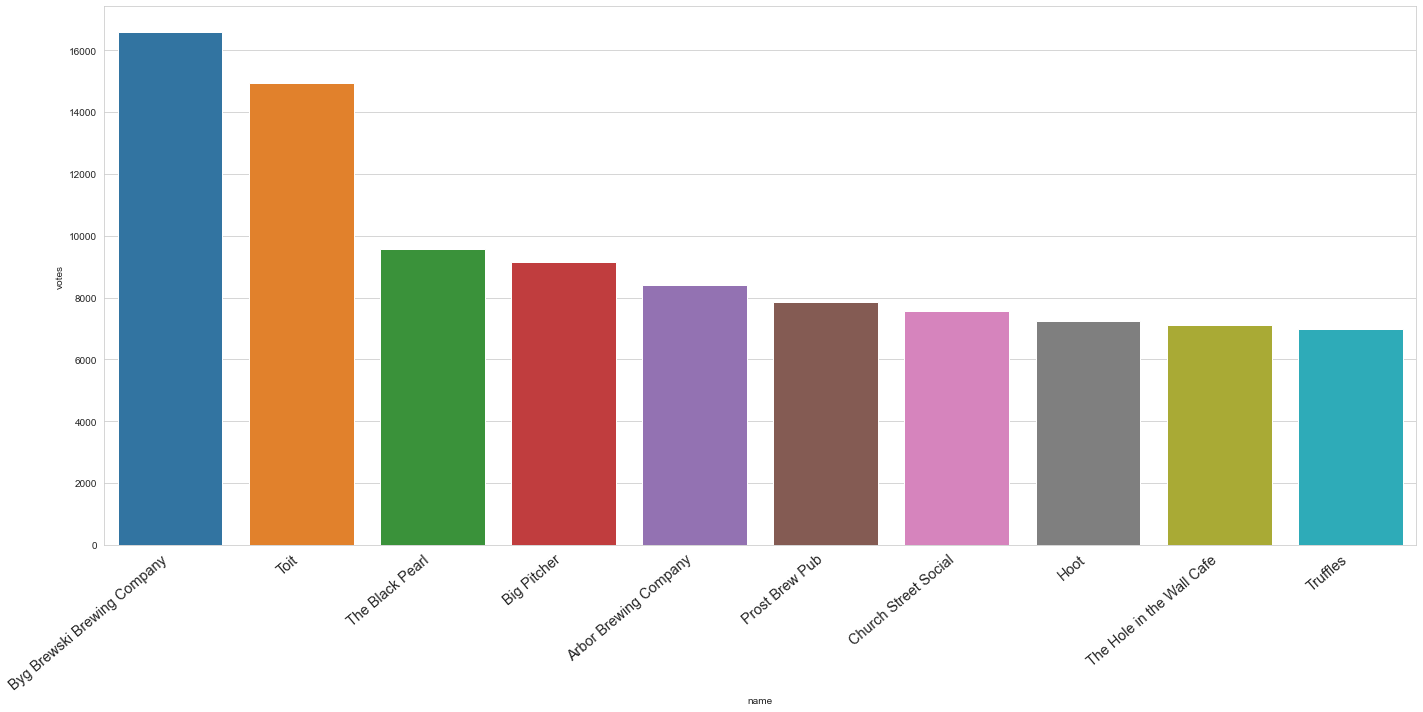

In [35]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="name",y="votes",data=high_vote)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**2) which are top 10 resturant with highest rating?**

In [36]:
high_rate=df.groupby("name")[["rate"]].mean().sort_values(by="rate",ascending=False).head(10).reset_index()

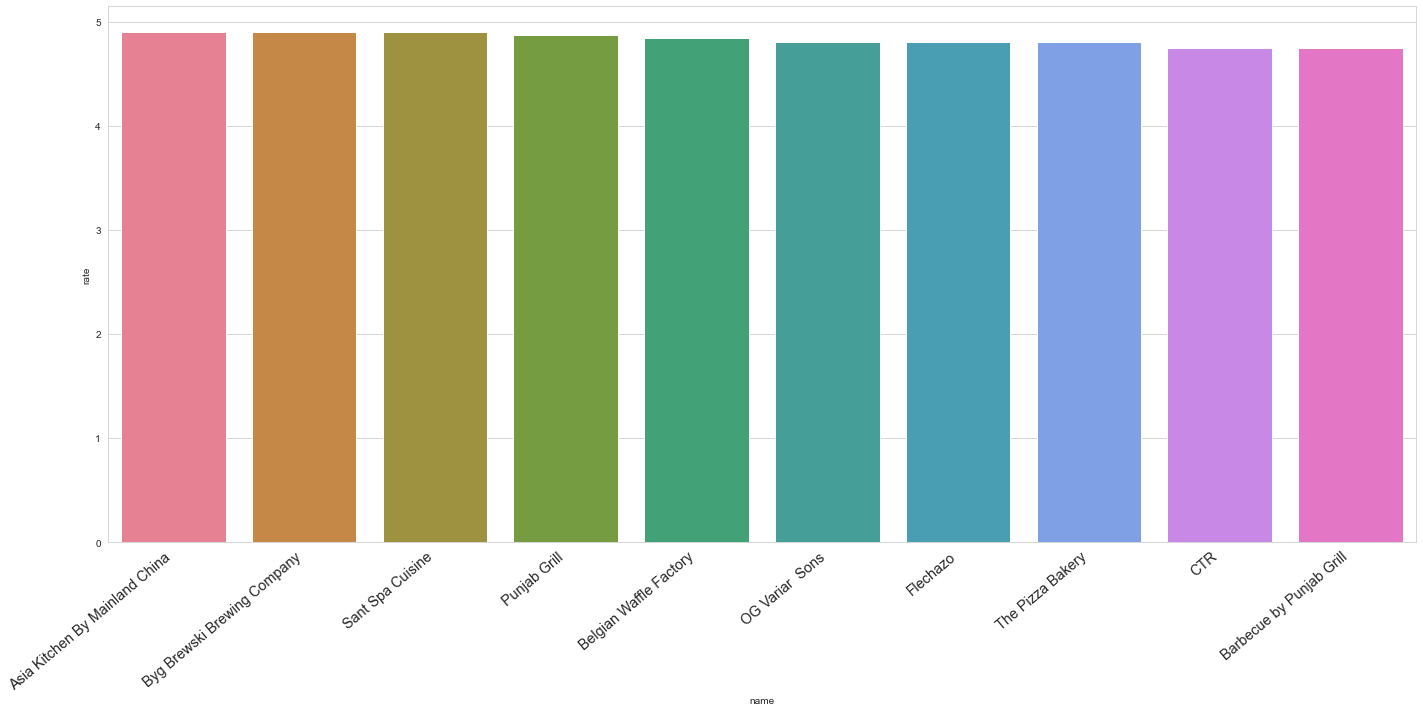

In [76]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="name",y="rate",data=high_rate,palette="husl")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**3)which are top 10 expensive resturant in bangalore?**

In [38]:
high_cost=df.groupby(["name"])[["approx_cost(for two people)"]].mean().sort_values(by="approx_cost(for two people)",ascending=False).head(10).reset_index()

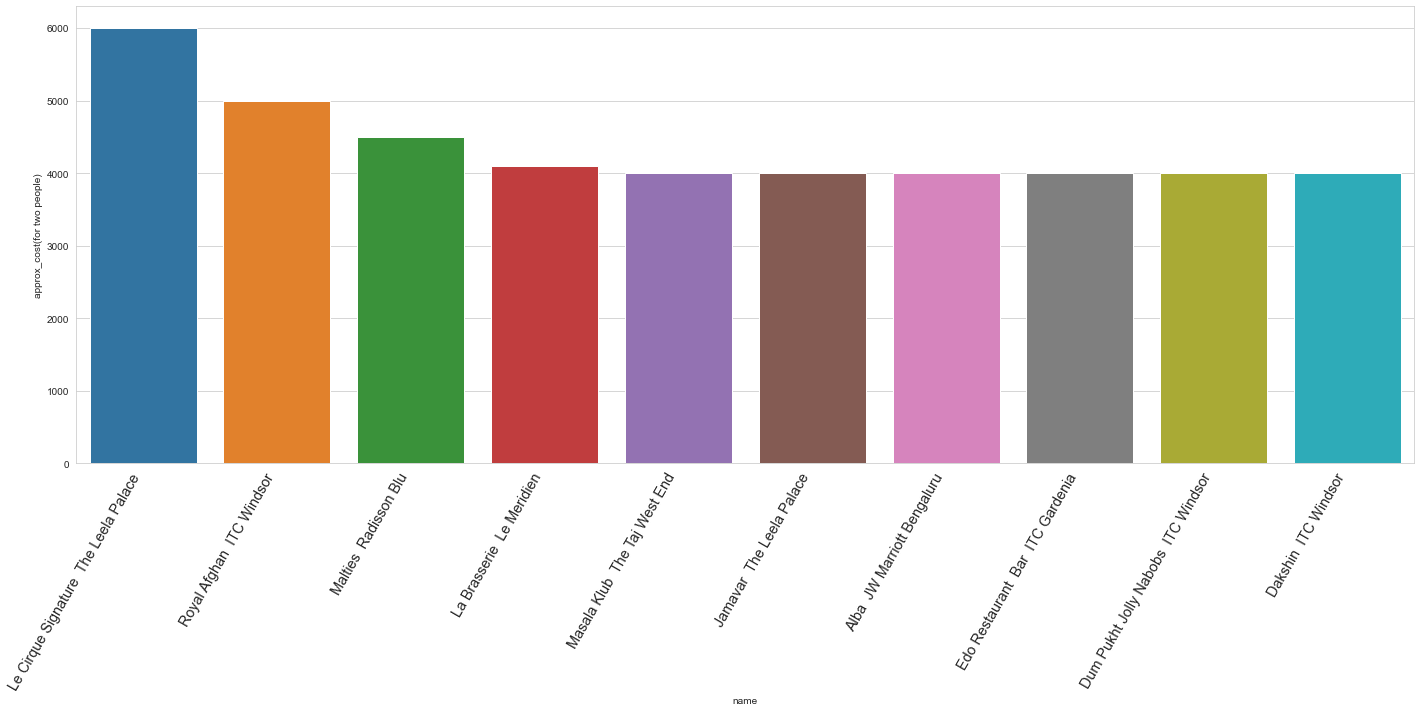

In [77]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.barplot(data=high_cost,y="approx_cost(for two people)",x="name",palette="tab10")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**5)which are Top 10 resturant with affordable cost and high rate?**

In [46]:
afford_rest=df.groupby(["name"])[["approx_cost(for two people)","rate"]].mean()

In [47]:
afford_rest["approx_cost(for two people)"].mean()

496.5940359338634

In [50]:
afford=afford_rest[(afford_rest["approx_cost(for two people)"]<afford_rest["approx_cost(for two people)"].mean()) & (afford_rest["rate"]>afford_rest["rate"].mean())].head(10).reset_index()

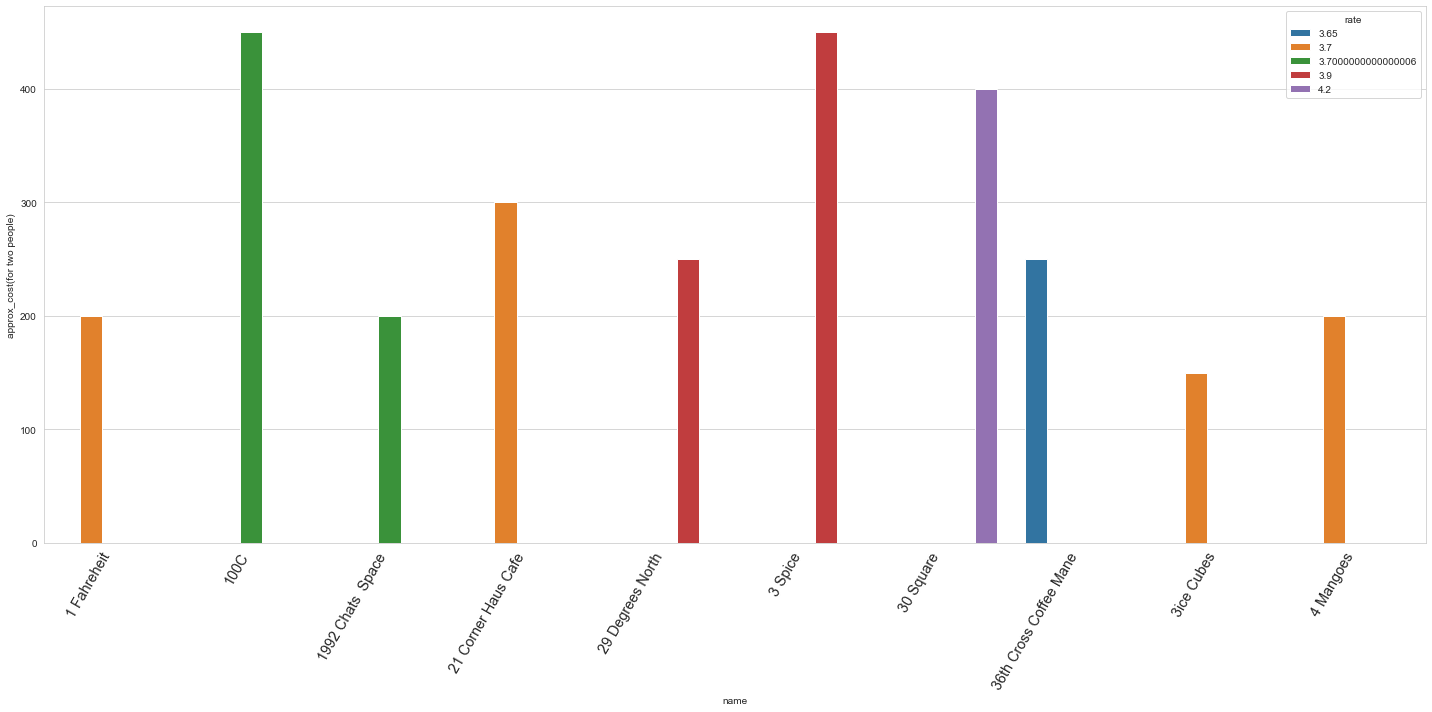

In [79]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.barplot(data=afford,y="approx_cost(for two people)",x="name",hue="rate")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**6)what are rating of types of resturant(with and without book_table)?**

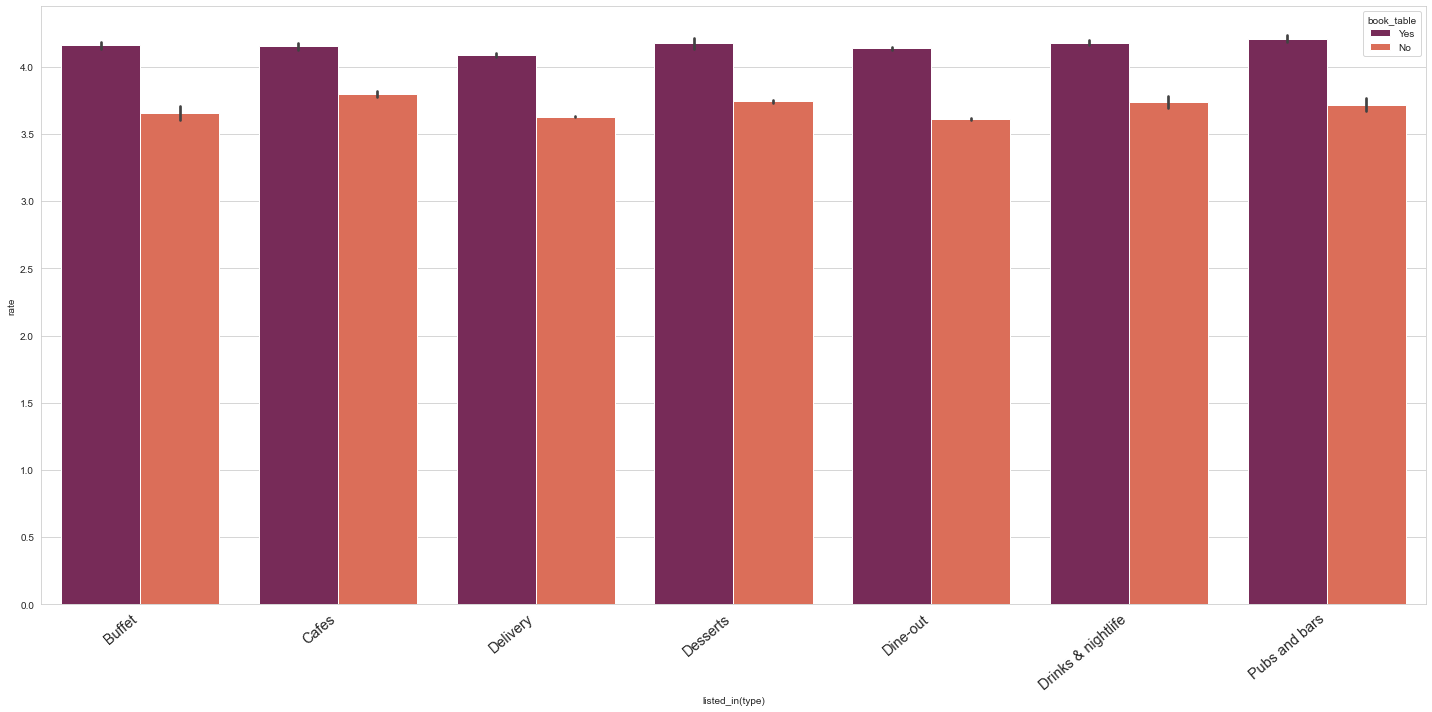

In [81]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="rate",data=df,hue="book_table",palette="rocket")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**7)what are rating of types of resturant(with and without online_order)?**

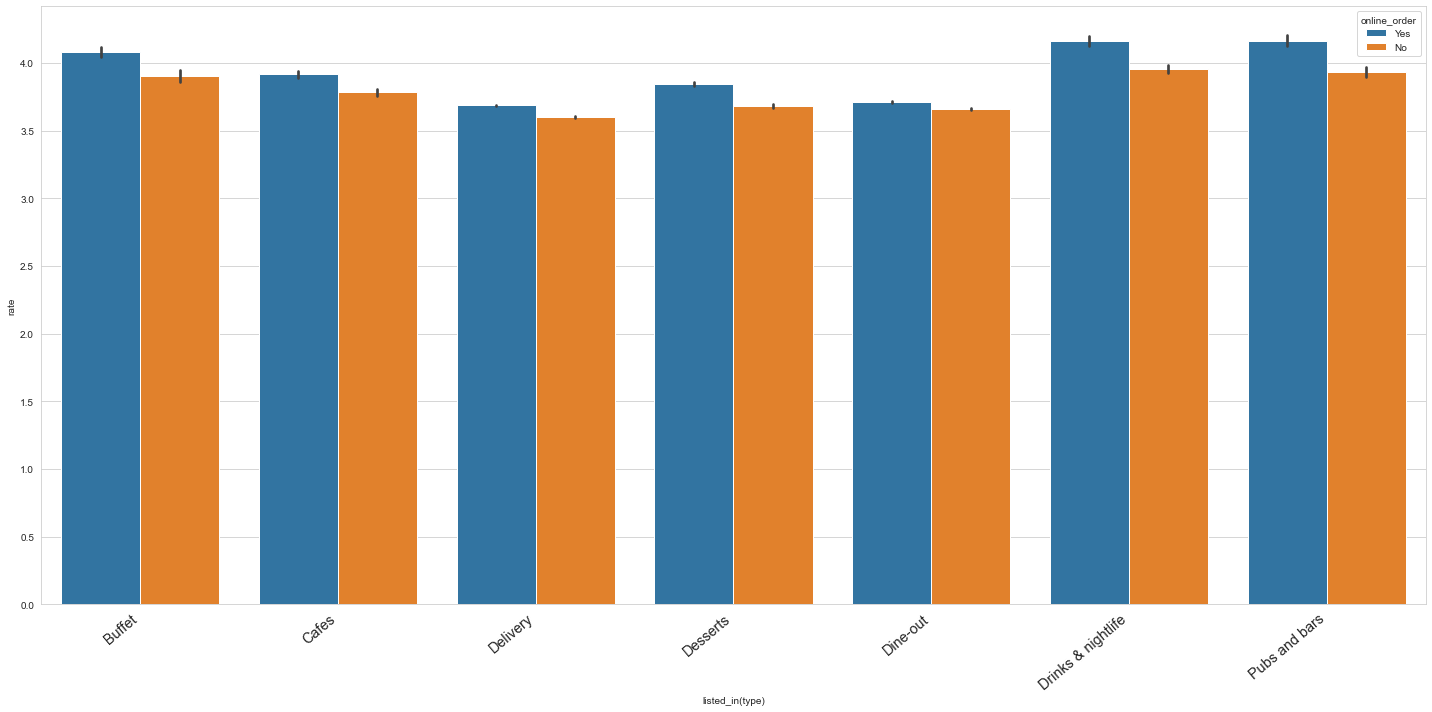

In [53]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="rate",data=df,hue="online_order")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**8)what is cost of two people for types of resturant(with or wtithout booking table)?**

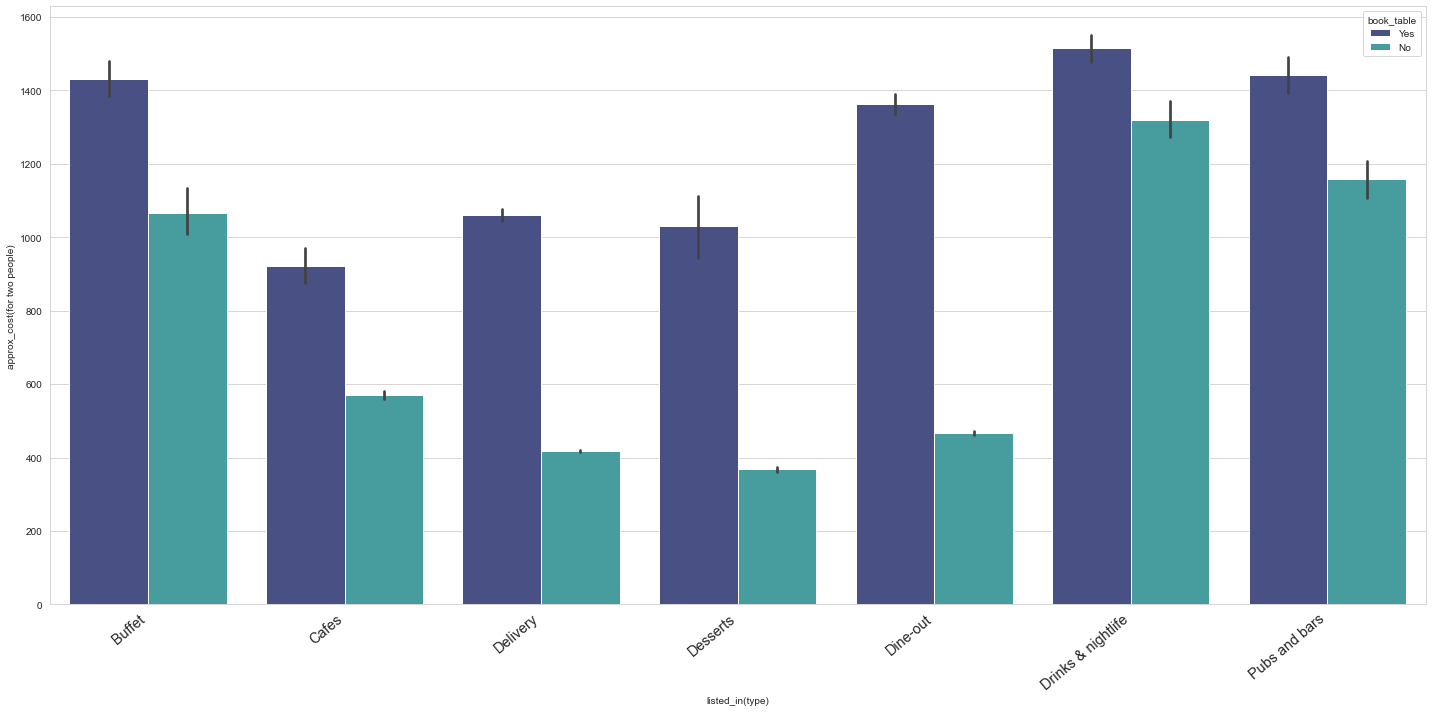

In [86]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="approx_cost(for two people)",data=df,hue="book_table",palette="mako")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**8)what is cost of two people for types of resturant(with or wtithout online_order)?**

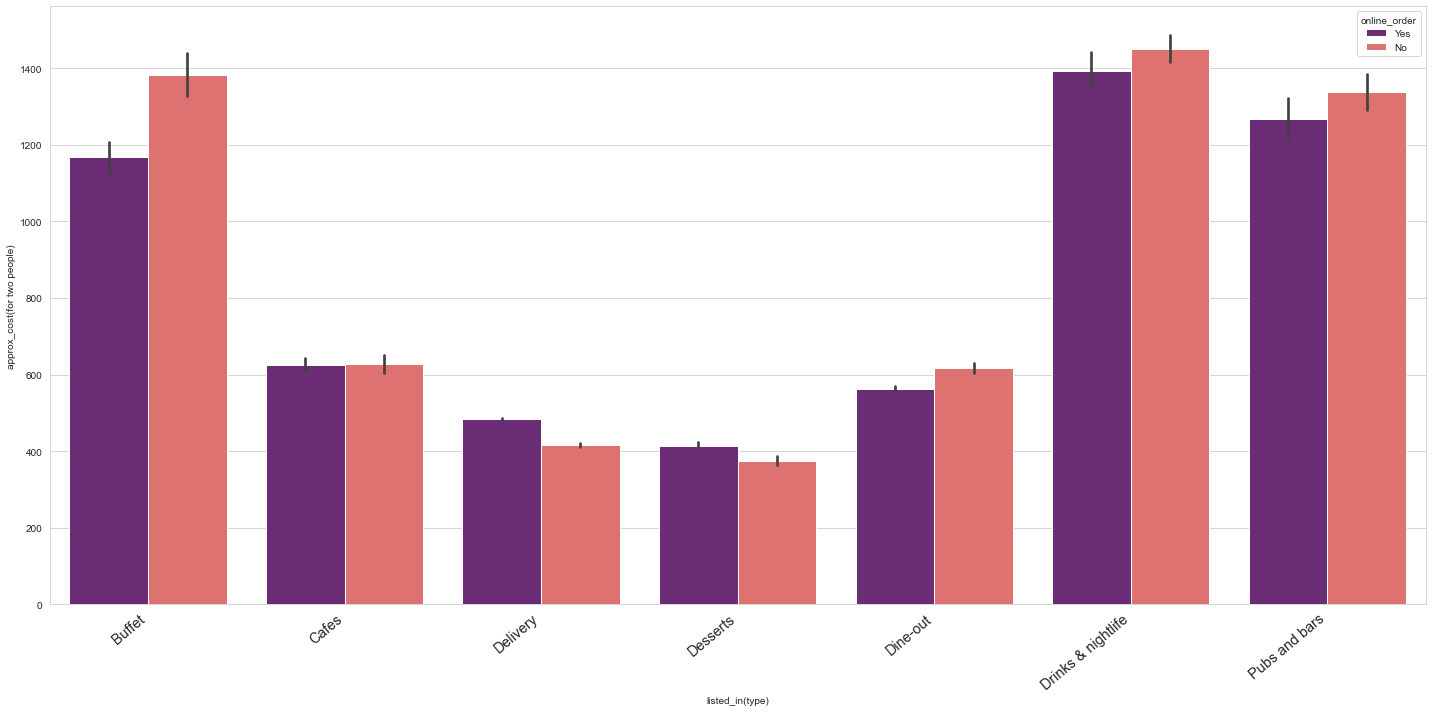

In [90]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="approx_cost(for two people)",data=df,hue="online_order",palette="magma")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**9)how many votes does city recieved(with or without booking table)?** 

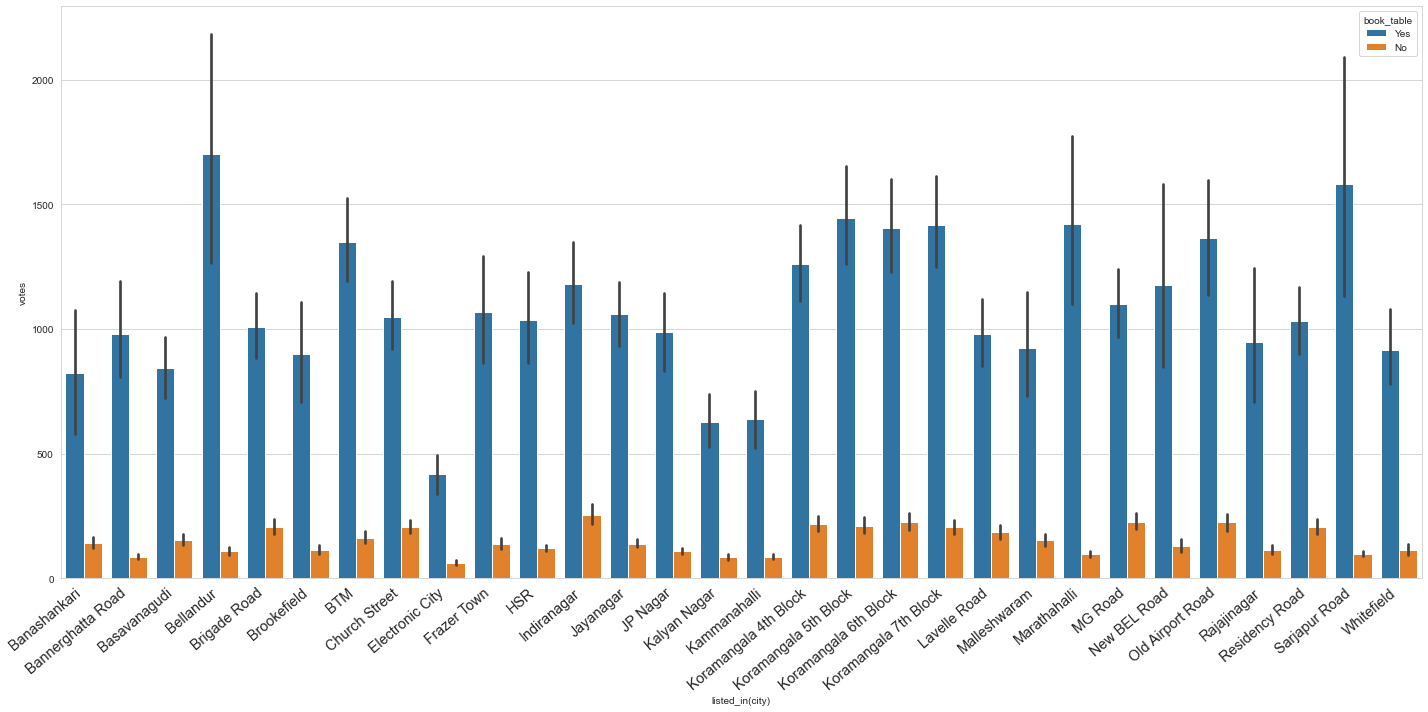

In [57]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="votes",data=df,hue="book_table")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**10)how many votes does city recieved(with or without online_order)?** 

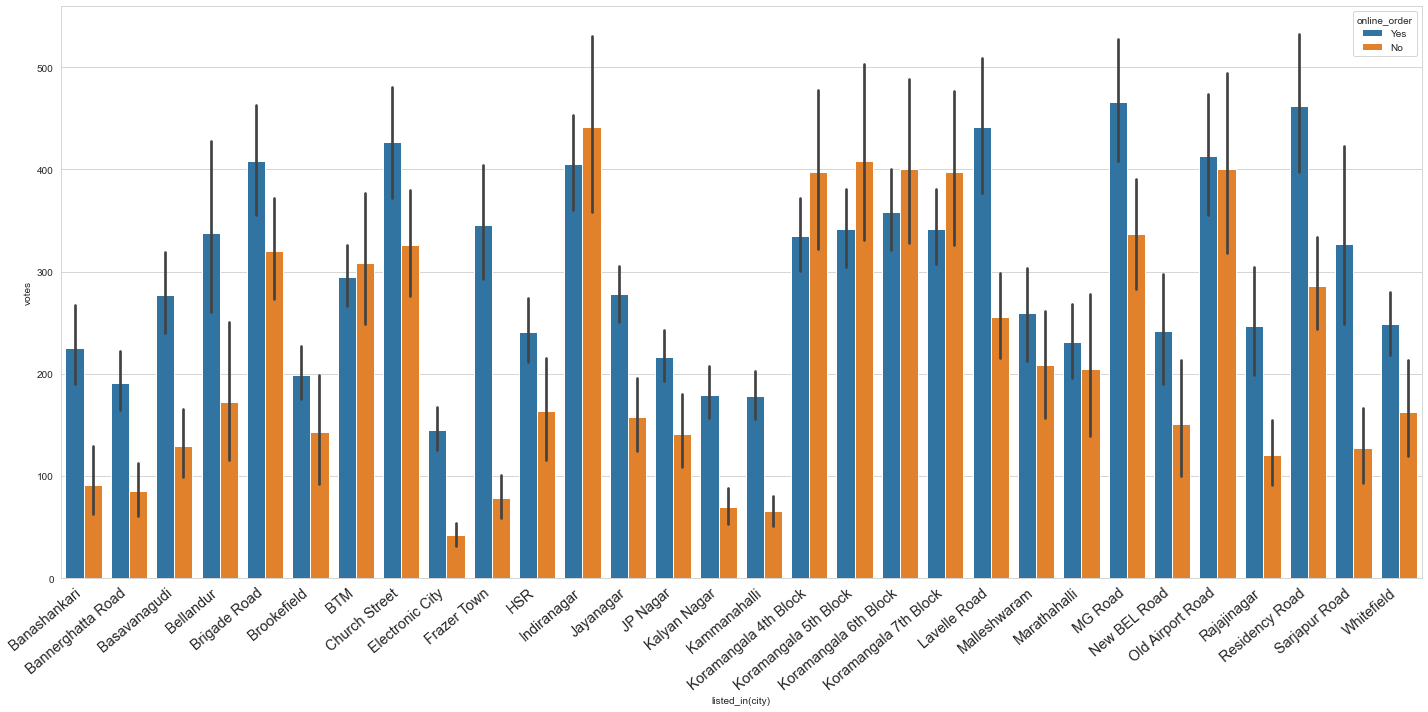

In [80]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="votes",data=df,hue="online_order")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**11)what is rating for city(with or without online_order)?**

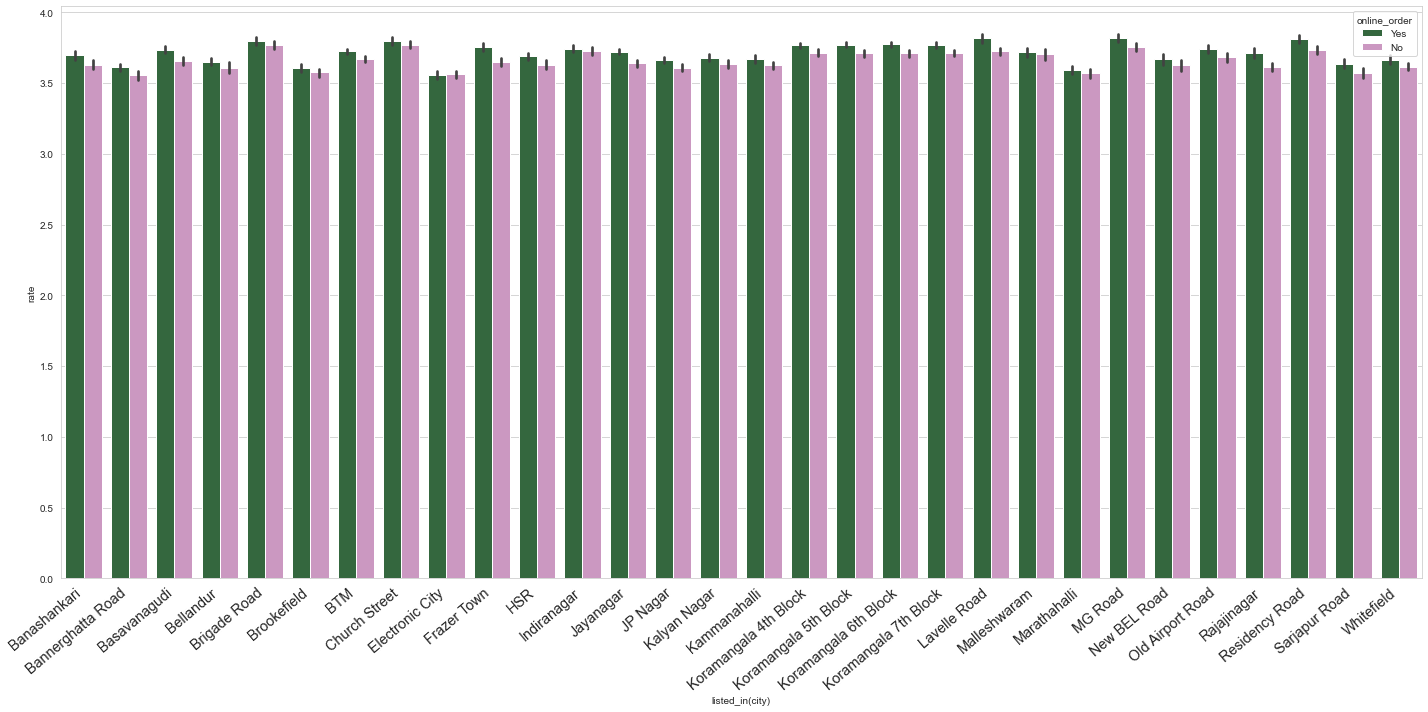

In [91]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="rate",data=df,hue="online_order",palette="cubehelix")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**12)what is rating for city(with or without book_table)?**

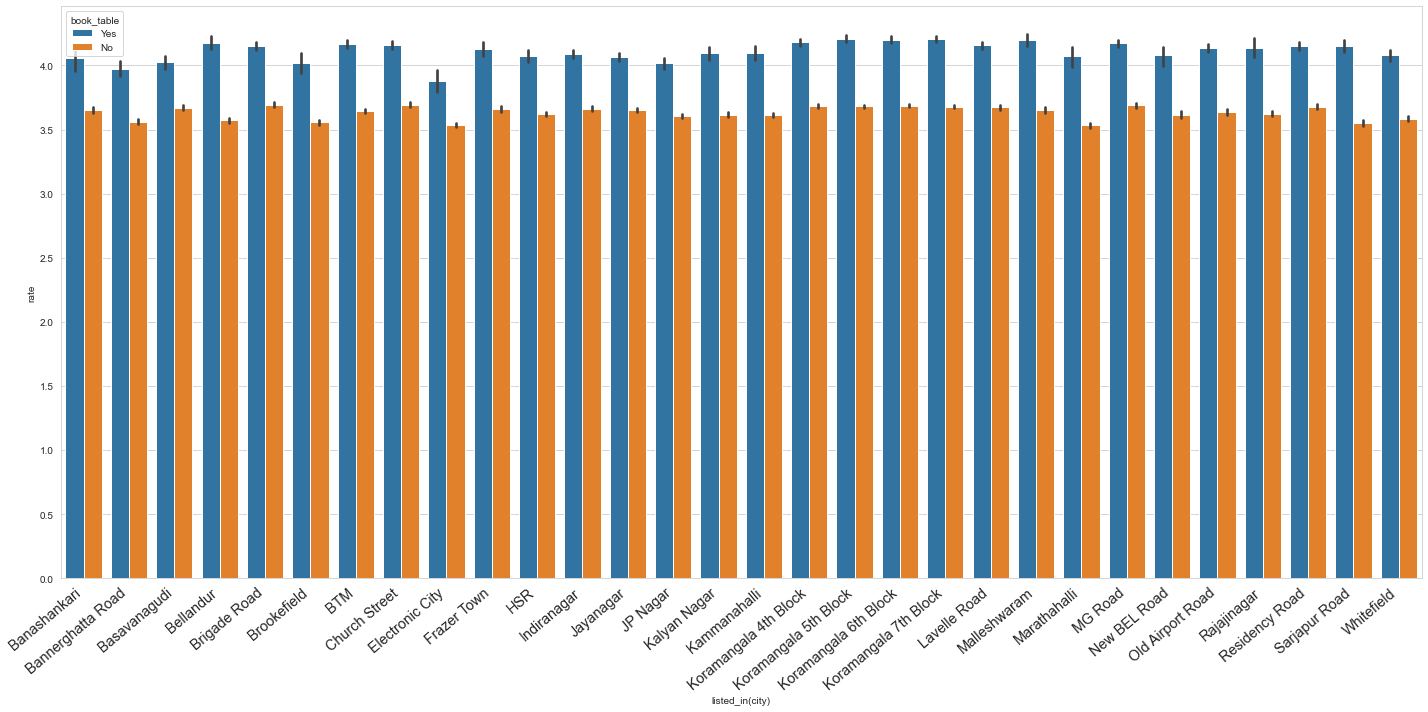

In [82]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="rate",data=df,hue="book_table")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**13)how many votes does each loaction got?**

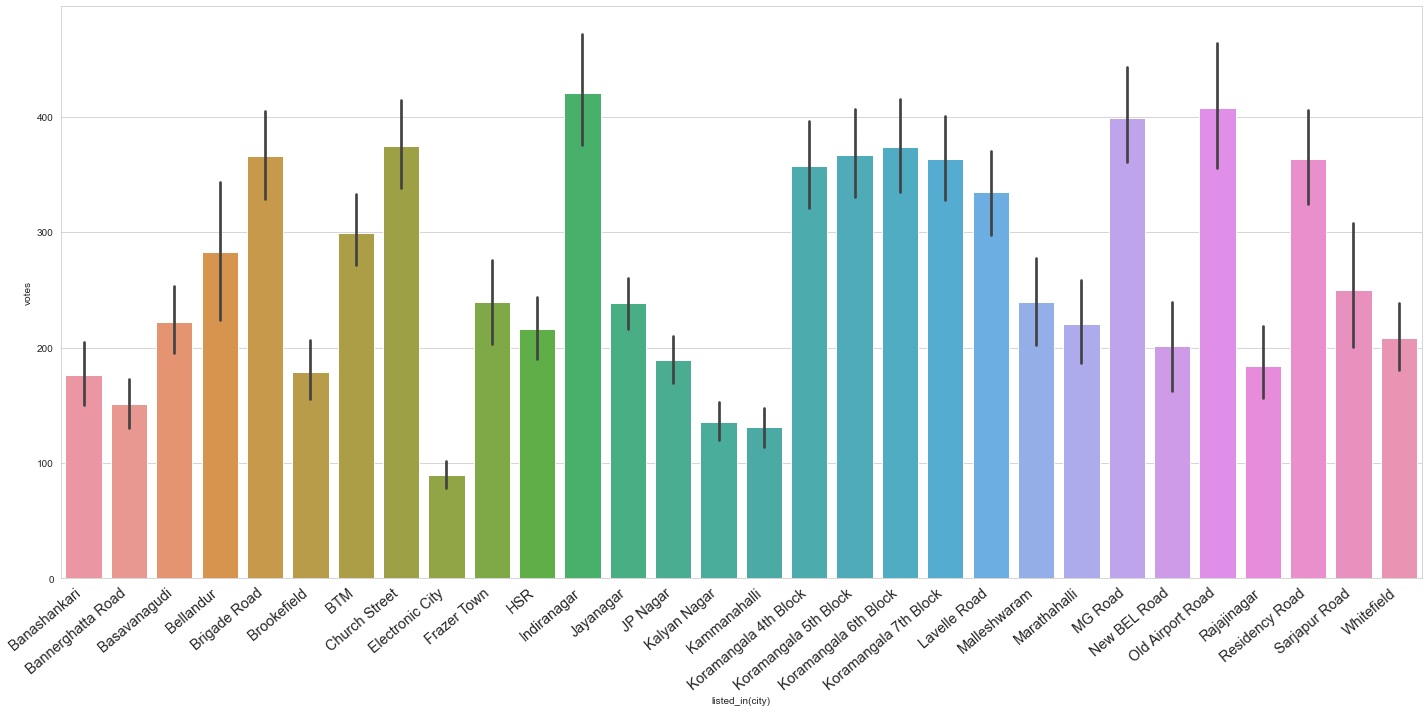

In [85]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="votes",data=df)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**14)location wise rating.**

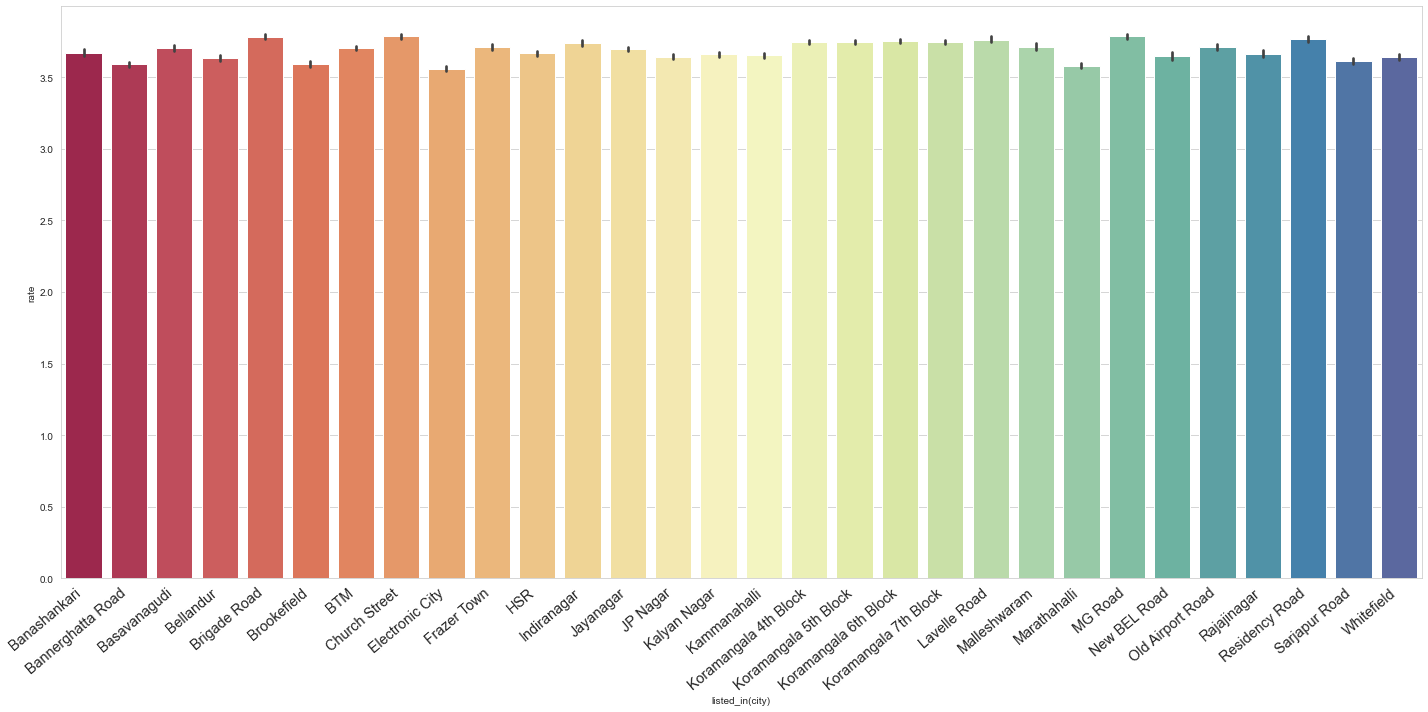

In [92]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="rate",data=df,palette="Spectral")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**15)city wise cost of two people in bangalore.**

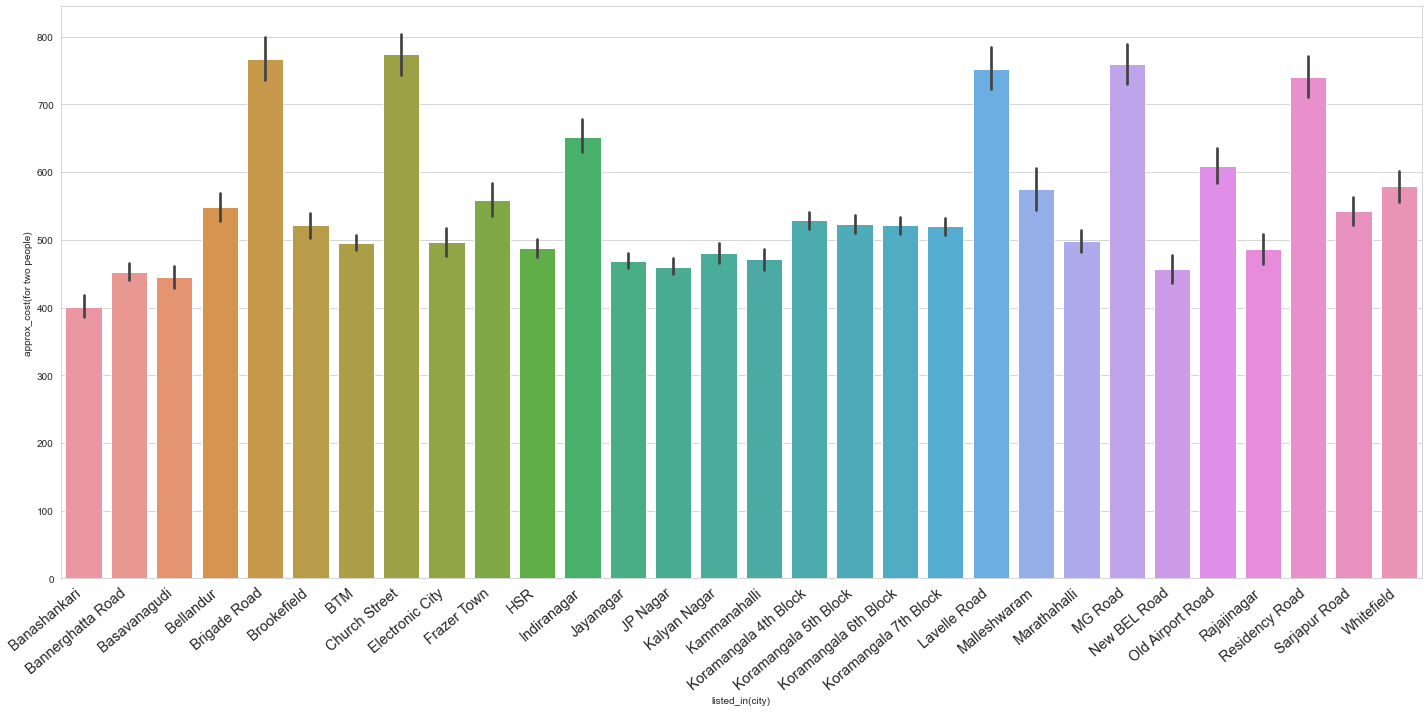

In [89]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(city)",y="approx_cost(for two people)",data=df)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**16)cost of two people for types of resturant.** 

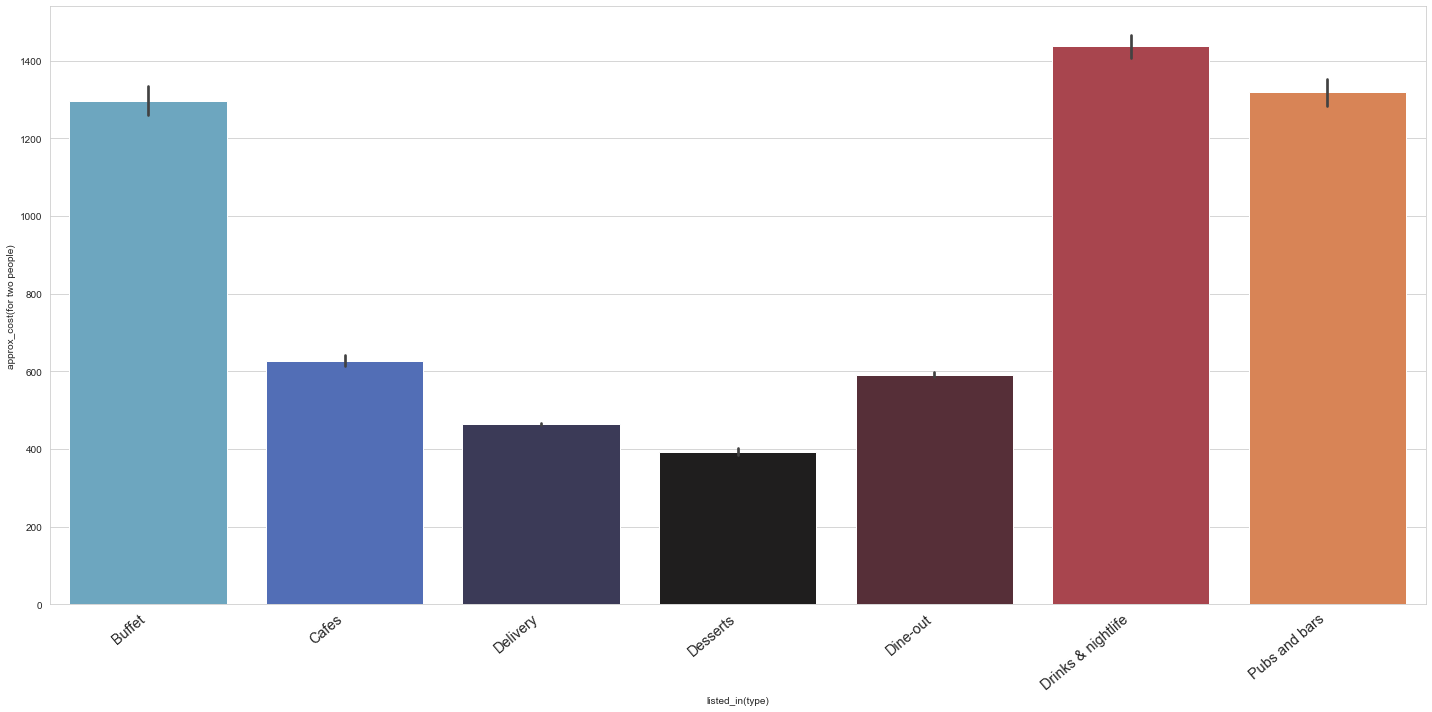

In [95]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="approx_cost(for two people)",data=df,palette="icefire")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**17)rating for types of resturant.** 

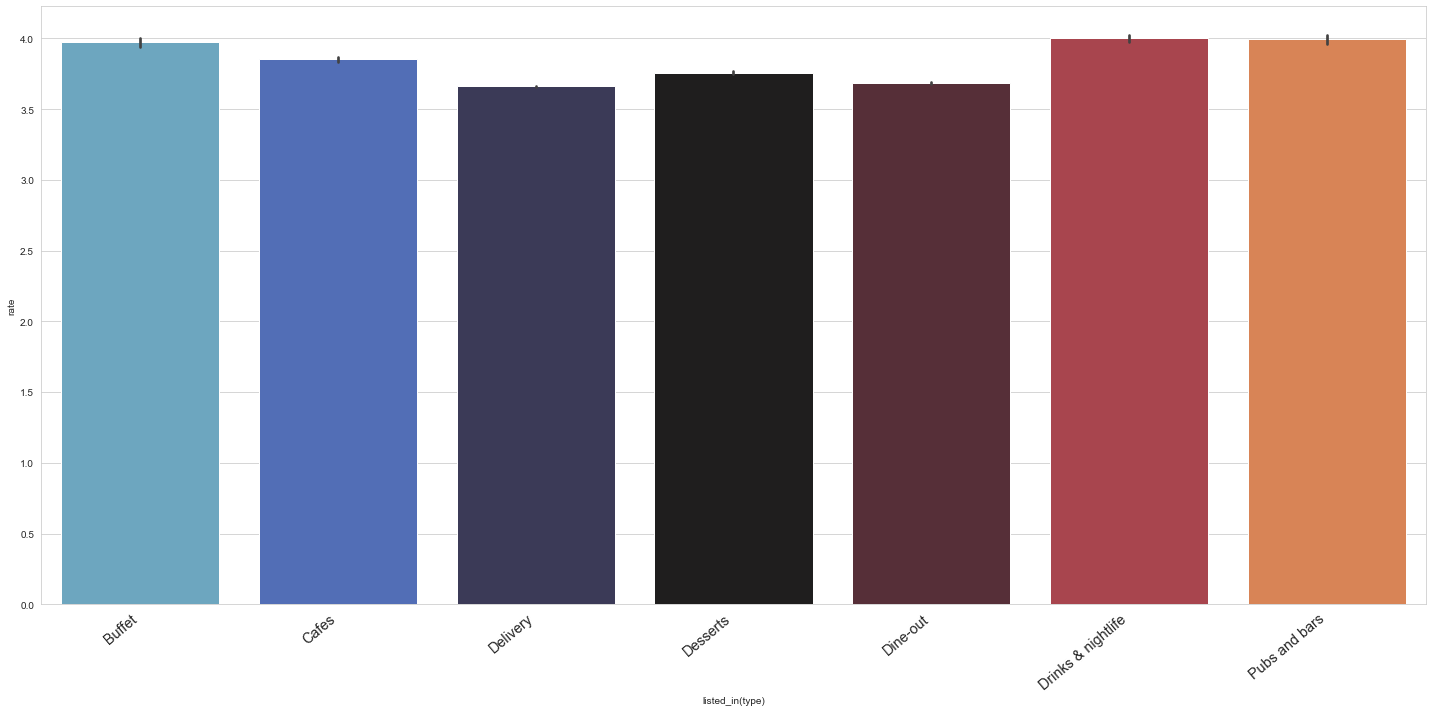

In [94]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="rate",data=df,palette="icefire")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**18)votings for types of resturant.** 

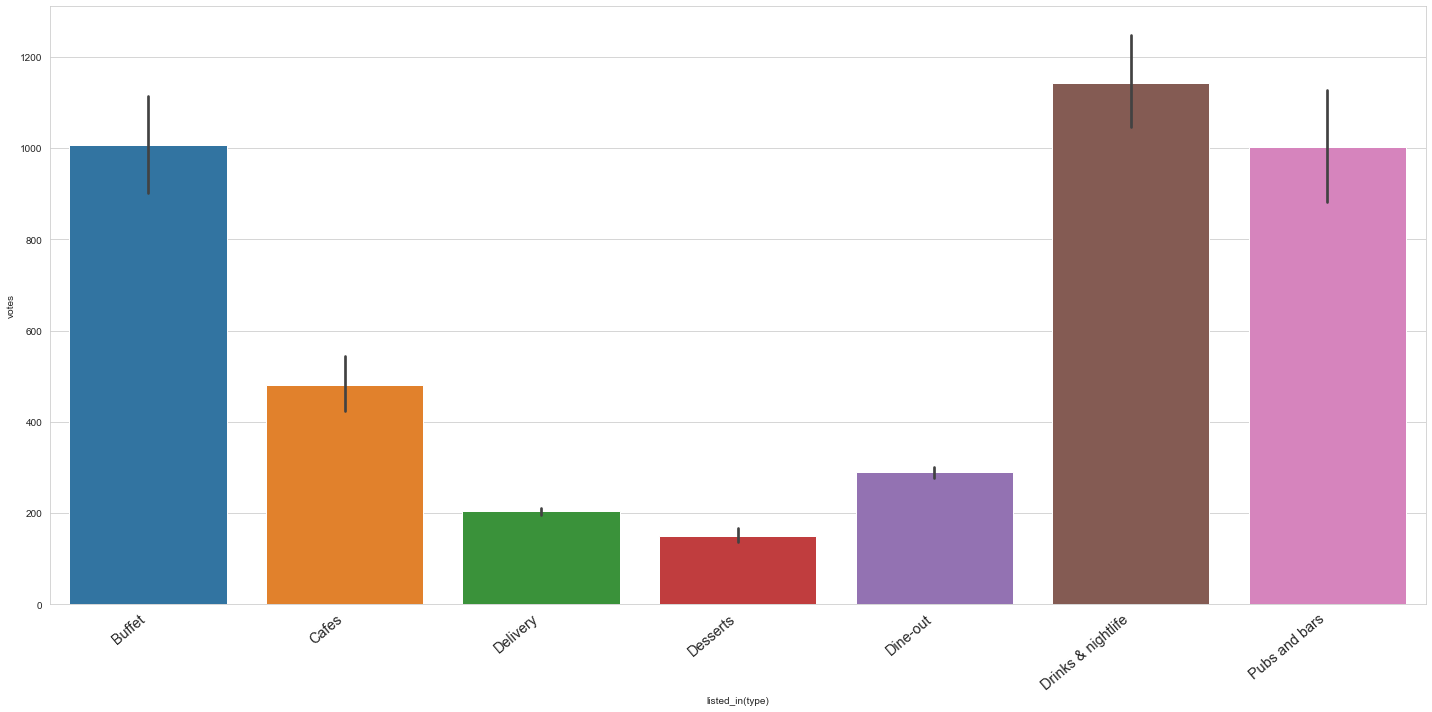

In [93]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="listed_in(type)",y="votes",data=df)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**19)rating of north and south indian cuisines for type of resturants.**

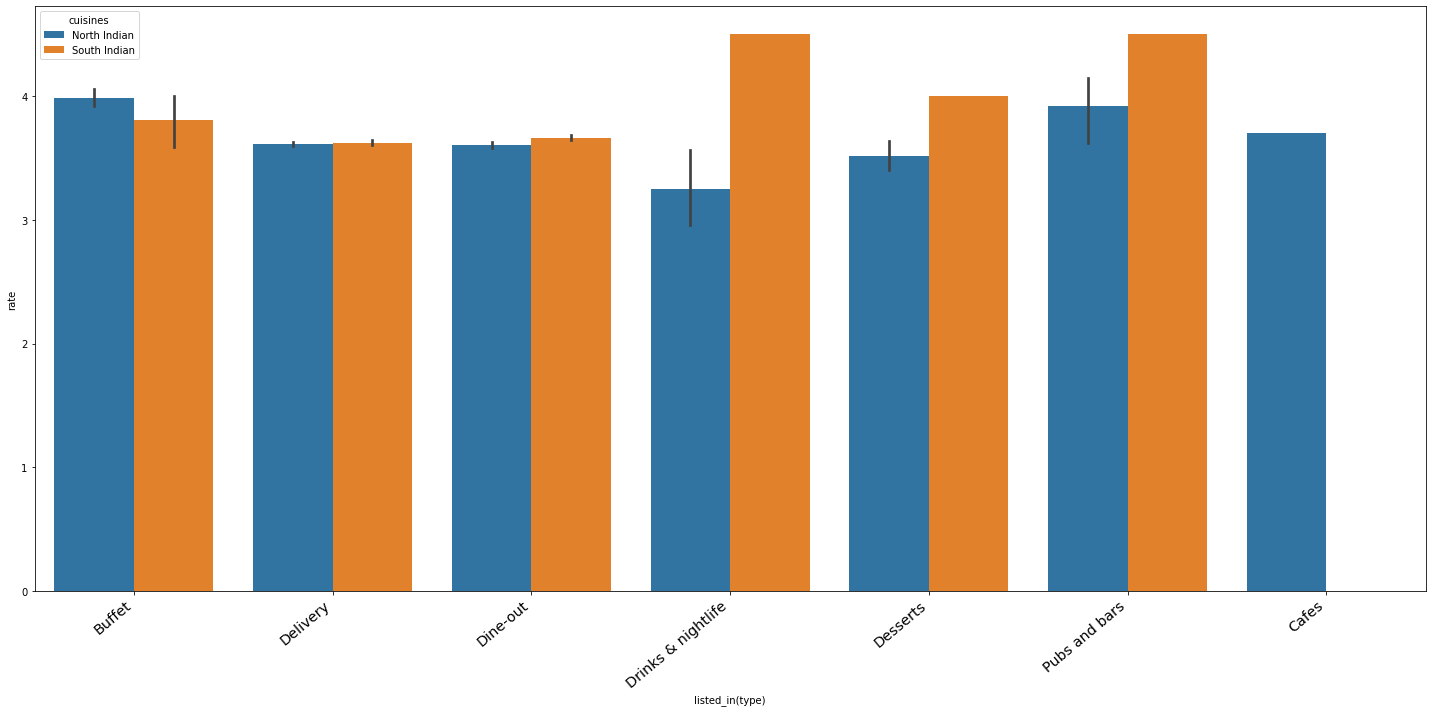

In [71]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(type)",y="rate",data=df[["listed_in(type)","rate","cuisines"]][df["cuisines"].isin(["South Indian","North Indian"])],hue="cuisines",palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()


**20)rating of mutton and chicken biryani dish for type of resturants.**

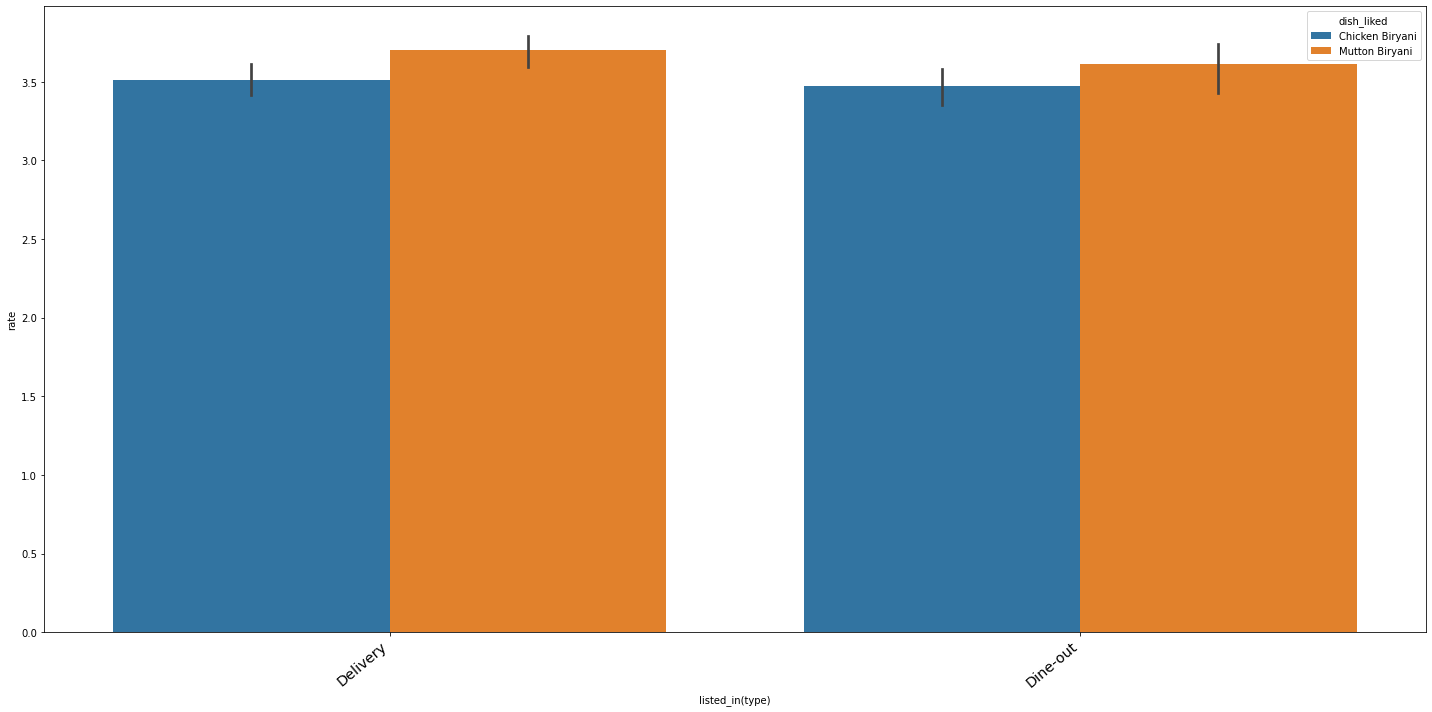

In [72]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(type)",y="rate",data=df[["listed_in(type)","rate","dish_liked"]][df["dish_liked"].isin(["Mutton Biryani","Chicken Biryani"])],hue="dish_liked",palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**21)rating of continental cuisines citywise.**

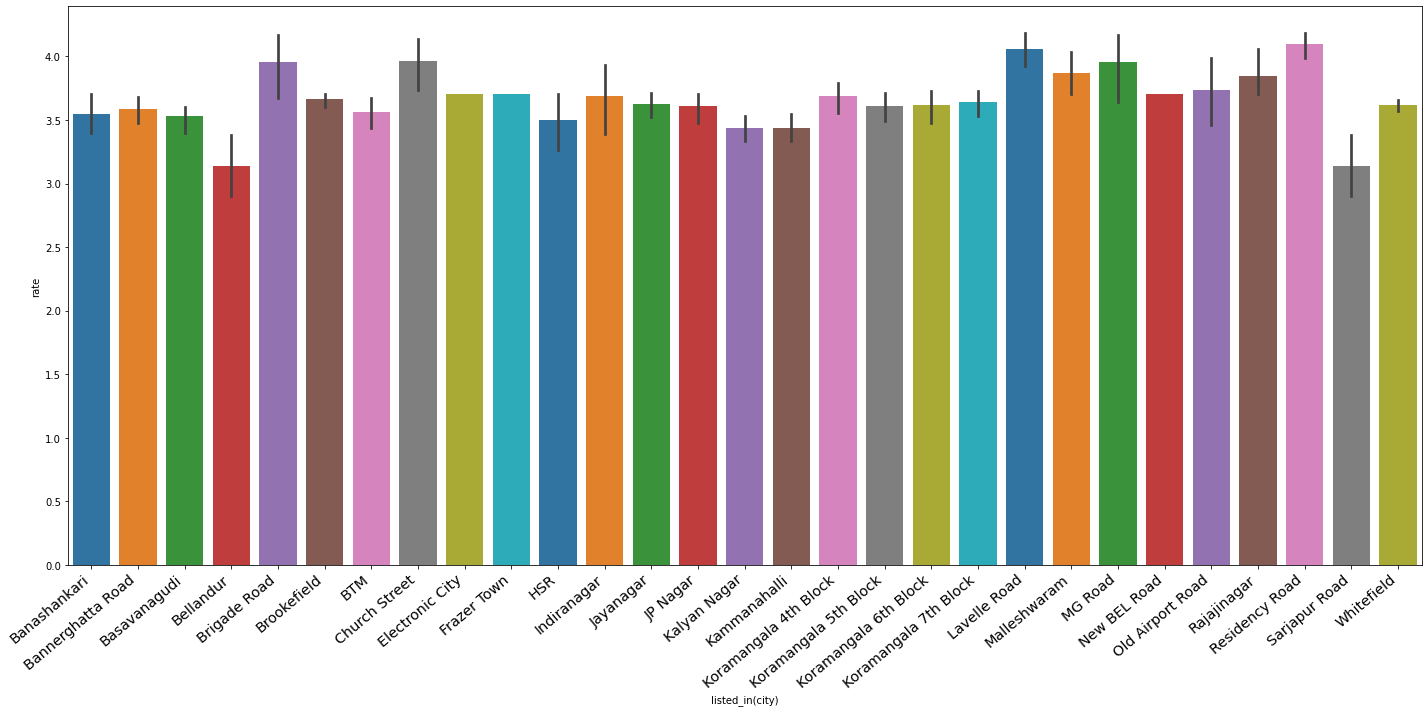

In [78]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(city)",y="rate",data=df[["listed_in(city)","rate","cuisines"]][df["cuisines"]=="Continental"]
            ,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()


**22)rating of momos dish citywise.**

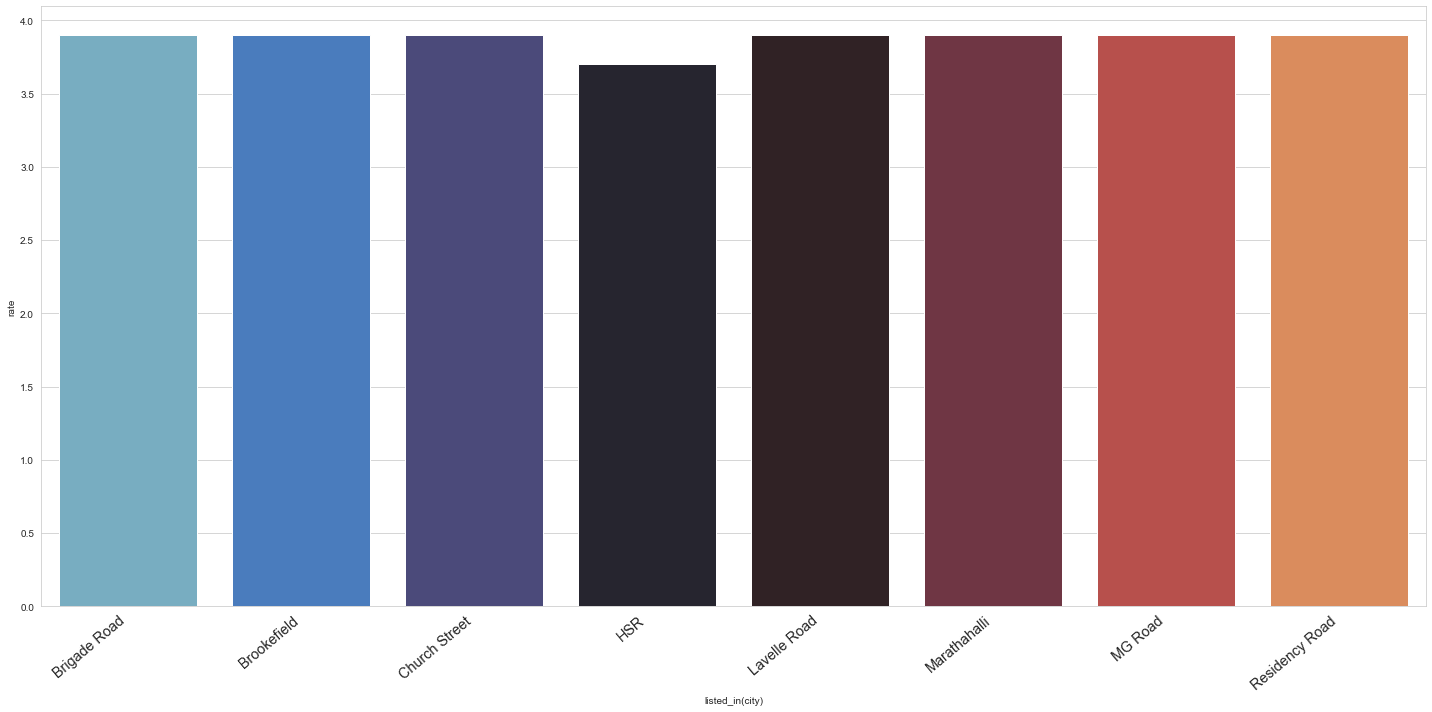

In [99]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(city)",y="rate",data=df[["listed_in(city)","rate","dish_liked"]][df["dish_liked"]=="Momos"]
            ,palette="icefire")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()


**23)rating of pizza cuisines resturantwise.

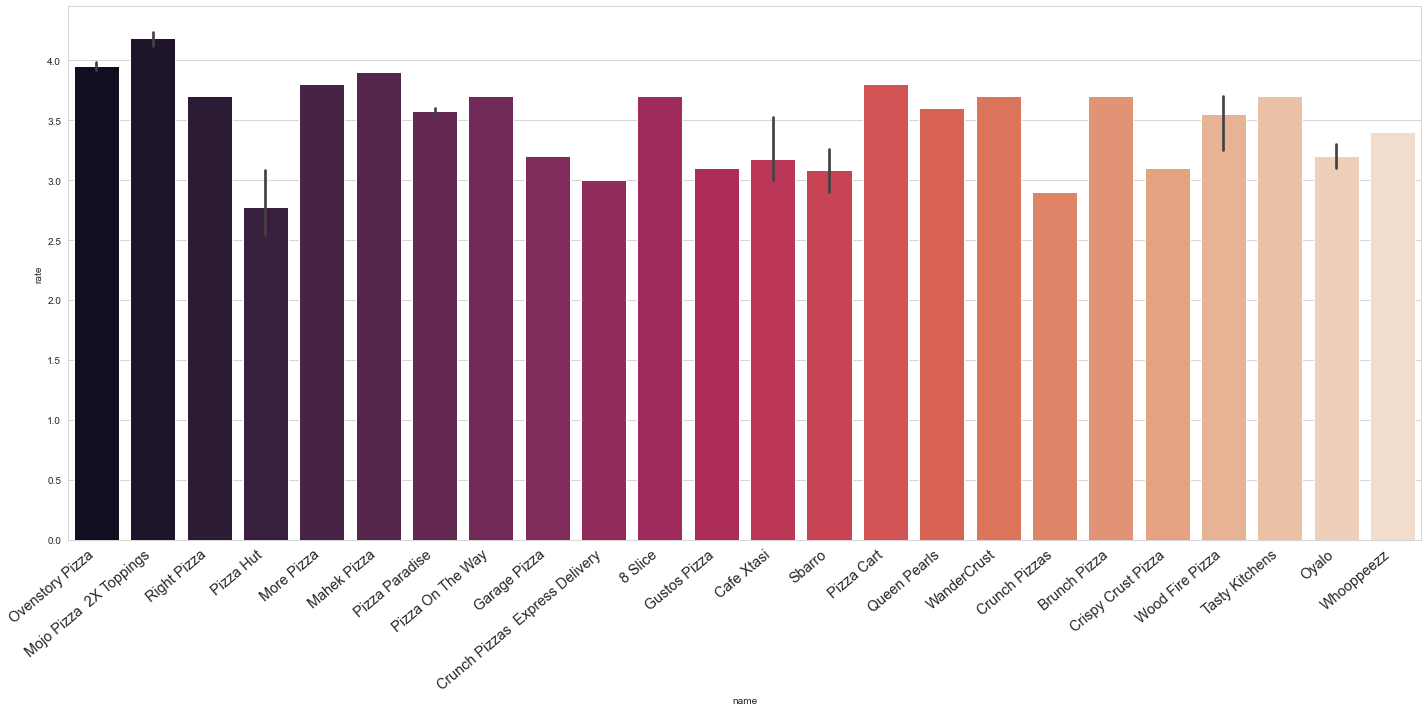

In [98]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="name",y="rate",data=df[["name","rate","cuisines"]][df["cuisines"]=="Pizza"]
            ,palette="rocket")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

 **24)rating of coffee for resturant.**

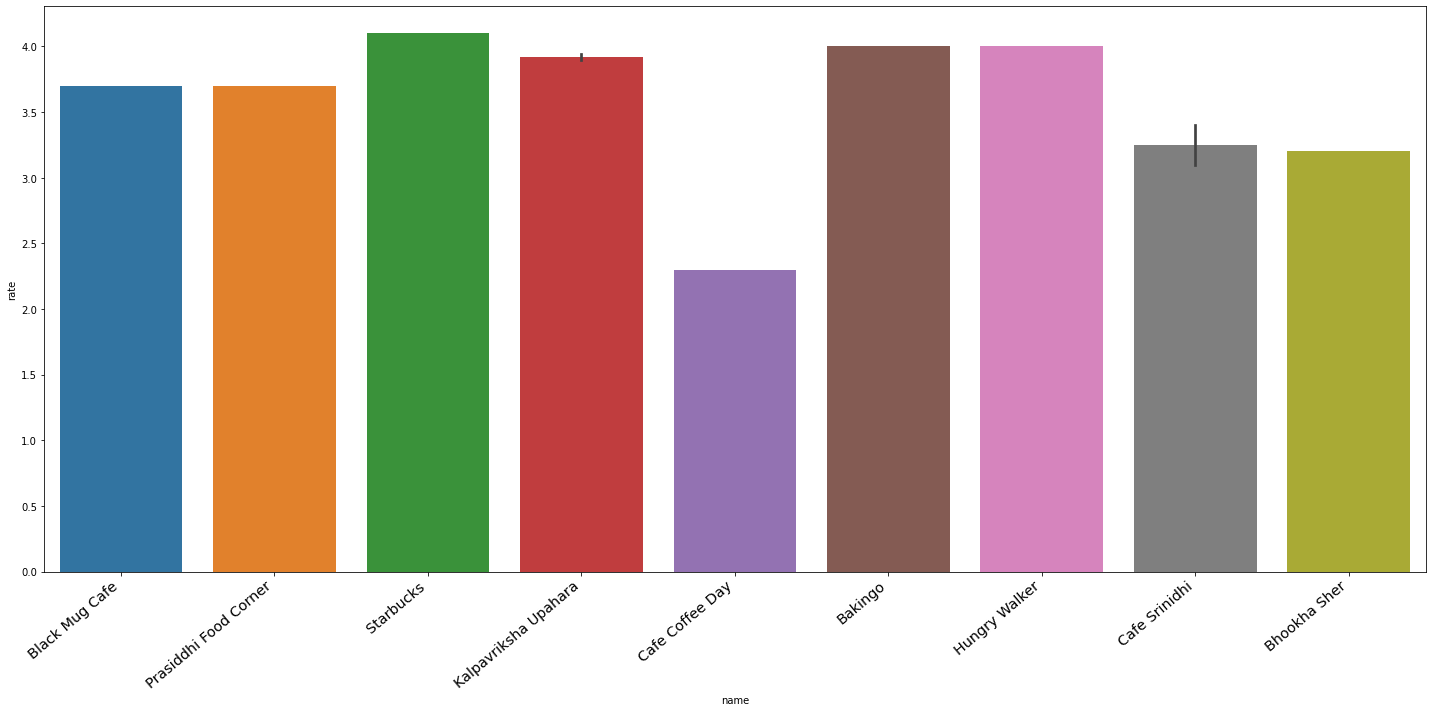

In [94]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="name",y="rate",data=df[["name","rate","dish_liked"]][df["dish_liked"]=="Coffee"],palette="")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**25)cost of 2 people for seafood in resturant.**

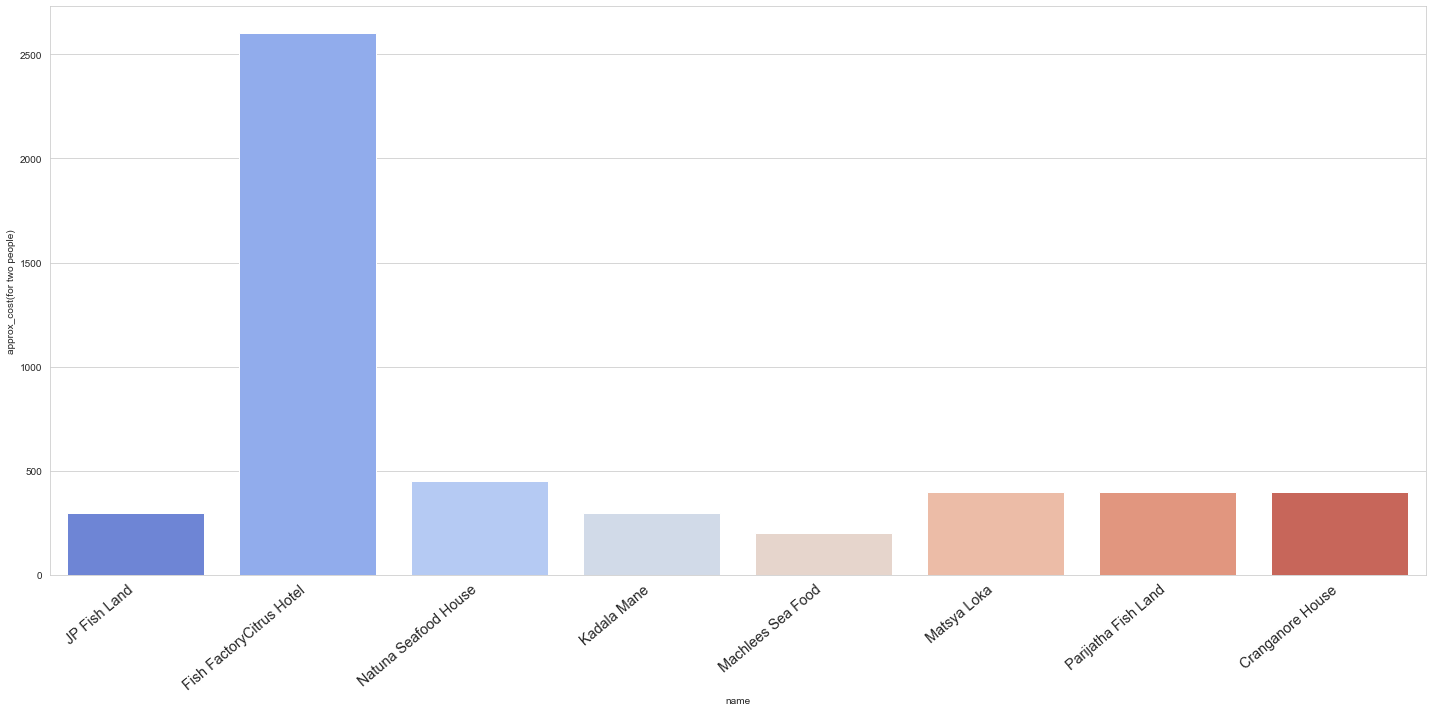

In [100]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="name",y="approx_cost(for two people)",data=df[["name","approx_cost(for two people)","cuisines"]][df["cuisines"]=="Seafood"]
            ,palette="coolwarm")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**26)votes for Beverages citywise.** 

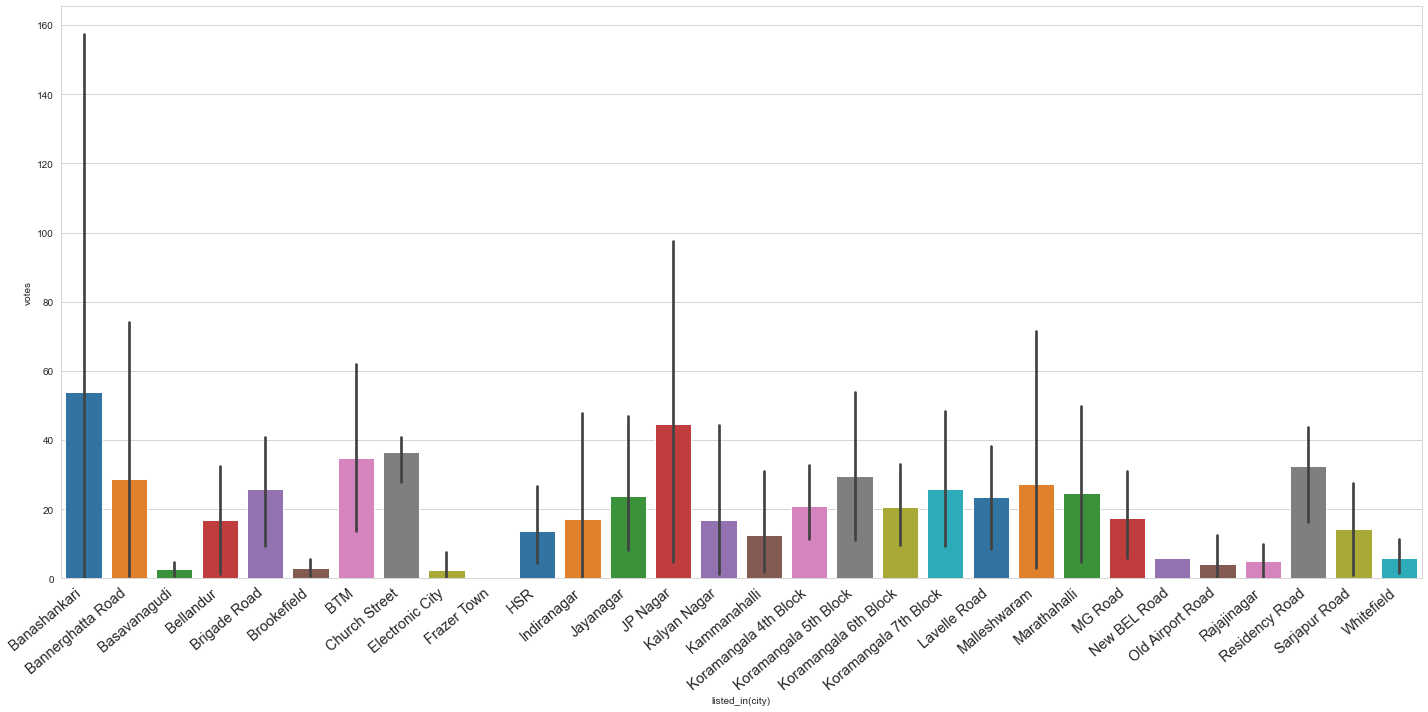

In [152]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(city)",y="votes",data=df[["listed_in(city)","votes","cuisines"]][df["cuisines"]=="Beverages"]
            ,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**27)votes for asian and continental citywise.** 

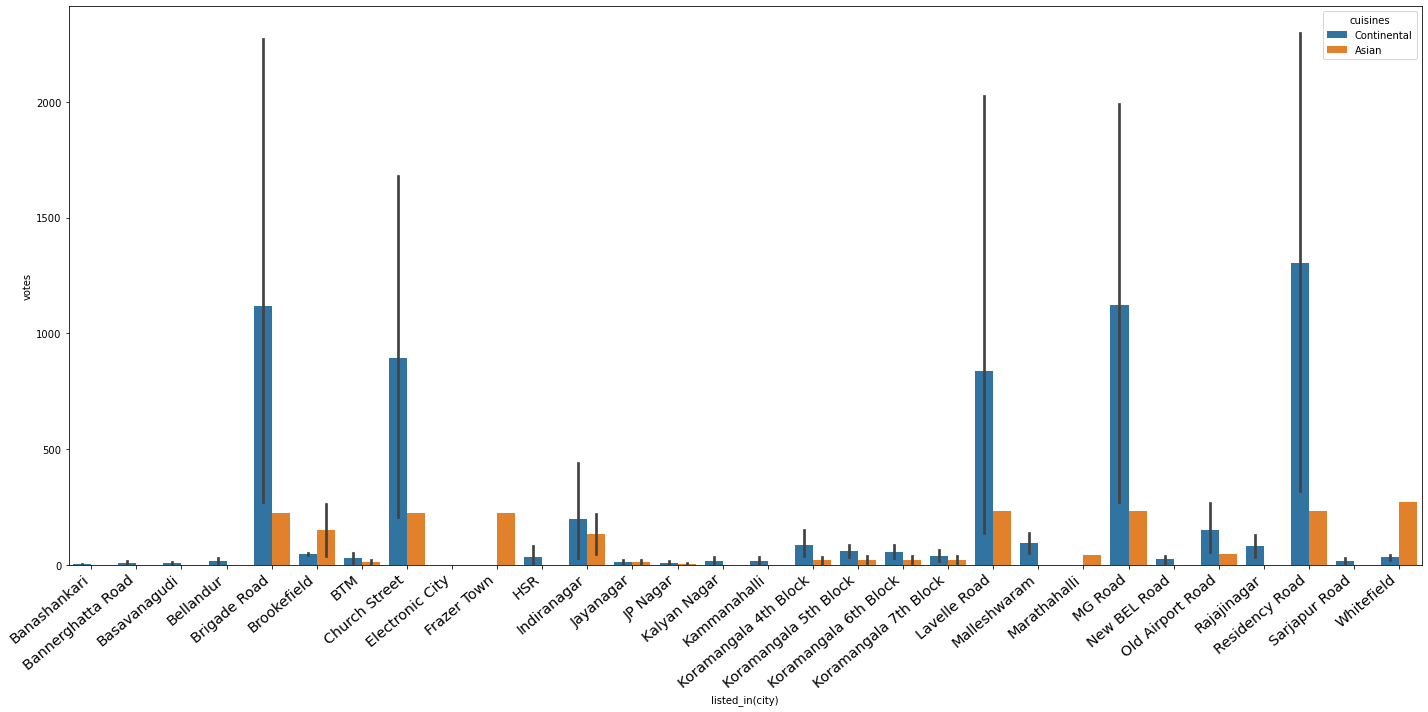

In [100]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(city)",y="votes",data=df[["listed_in(city)","votes","cuisines"]][df["cuisines"].isin(["Asian","Continental"])],hue="cuisines"
            ,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**28)percentage of rating for type of resturants.**

In [102]:
types=df.groupby("listed_in(type)")["rate"].mean().reset_index()

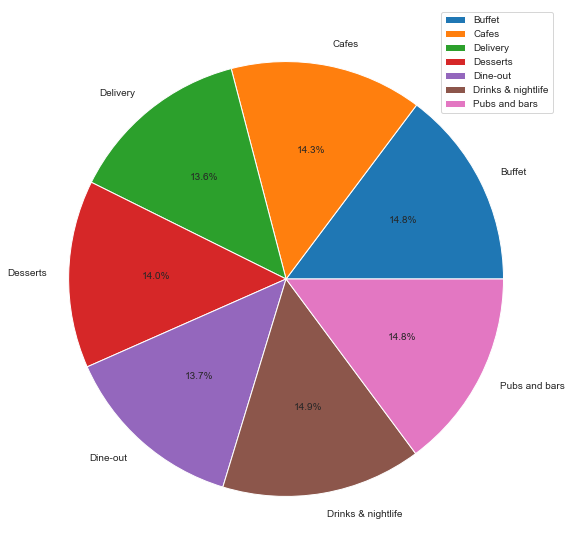

In [109]:
fig=plt.figure(figsize=(20,10))
per_types=pd.Series(types["listed_in(type)"])
per_rate=pd.Series(types["rate"])
plt.pie(per_rate,labels=per_types,autopct="%1.1f%%")
plt.legend()
plt.show()


**29)percentage of rating for citywise.**

In [189]:
city=df.groupby("listed_in(city)")["rate"].mean().reset_index()

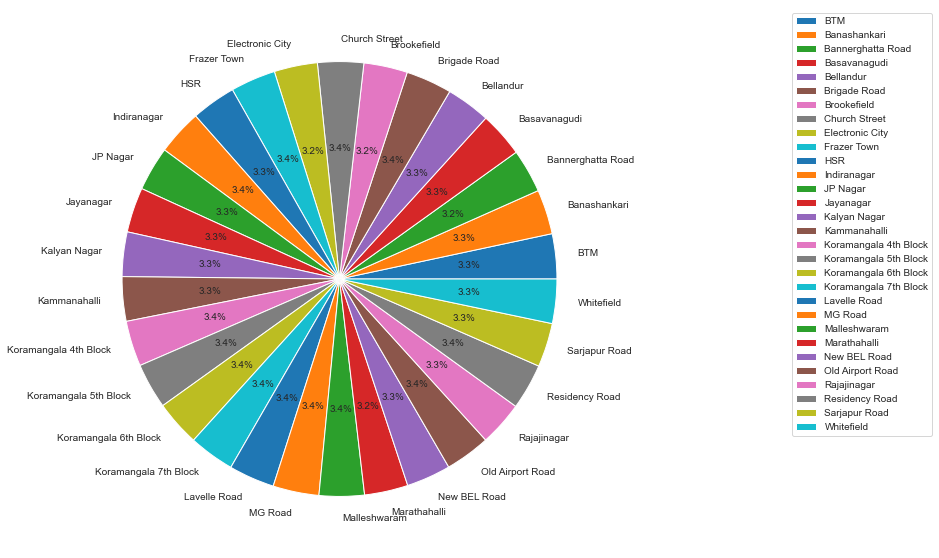

In [191]:
fig=plt.figure(figsize=(20,10))
per_city=pd.Series(city["listed_in(city)"])
per_rate=pd.Series(city["rate"])
plt.pie(per_rate,labels=per_city,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.show()


**30)percentage of cost of 2 people for citywise.**

In [192]:
city=df.groupby("listed_in(city)")["approx_cost(for two people)"].mean().reset_index()

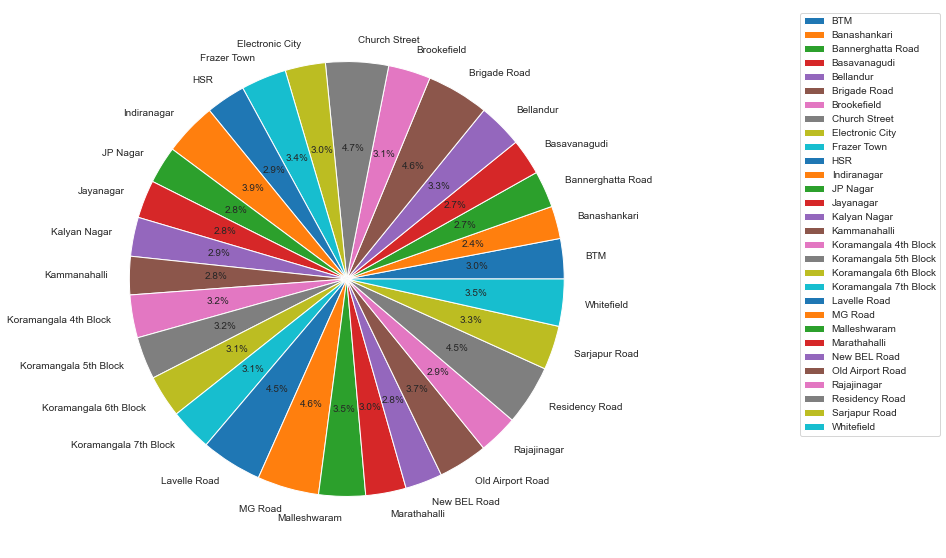

In [193]:
fig=plt.figure(figsize=(20,10))
per_city=pd.Series(city["listed_in(city)"])
per_rate=pd.Series(city["approx_cost(for two people)"])
plt.pie(per_rate,labels=per_city,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.show()


**31)percentage of cost of 2 people for types of resturants.**

In [194]:
city=df.groupby("listed_in(type)")["approx_cost(for two people)"].mean().reset_index()

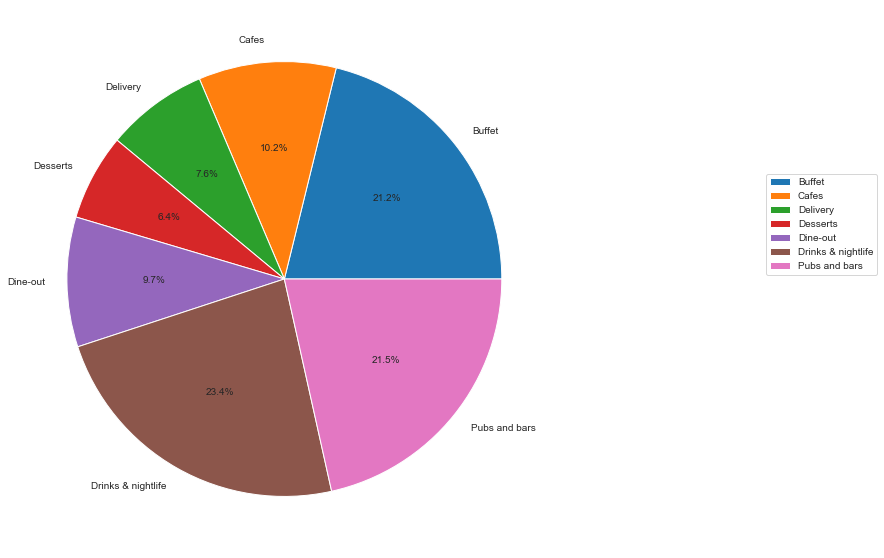

In [195]:
fig=plt.figure(figsize=(20,10))
per_city=pd.Series(city["listed_in(type)"])
per_rate=pd.Series(city["approx_cost(for two people)"])
plt.pie(per_rate,labels=per_city,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.show()


In [53]:
city_grp=df.groupby("listed_in(city)").mean().head(10).reset_index()

In [54]:
city_grp

,listed_in(city),rate,votes,approx_cost(for two people)
0,BTM,3.705605,299.585605,495.936490
1,Banashankari,3.671926,175.838747,401.437355
2,Bannerghatta Road,3.591522,151.505569,452.757290
3,Basavanagudi,3.706161,222.437599,445.224534
4,Bellandur,3.637705,282.898361,548.300673
5,Brigade Road,3.784502,365.621606,766.606629
6,Brookefield,3.595649,178.615030,521.371470
7,Church Street,3.786001,374.535416,773.723826
8,Electronic City,3.561206,89.489813,497.140212
9,Frazer Town,3.711993,239.314189,558.527281


In [55]:
import folium

In [56]:
from branca.element import Figure

In [64]:
fig = Figure(width=550,height=350)
bang=folium.Map(location=[12.972442,77.580643])#bangalore
fig.add_child(bang)
folium.Marker(location=[12.9166,77.6101],popup=(city_grp.iloc[0]),tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9255,77.5468],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.770137,77.567753],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9406,77.5738],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9304,77.6784],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9706,77.60024],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9655,77.7185],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9757,77.6058],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.8452,77.6602],popup="",tooltip='Click Me').add_to(bang)
folium.Marker(location=[12.9970,77.6144],popup="",tooltip='Click Me').add_to(bang)
bang




**32)find resturant where we have north inidan food & Chinese, Thai**

In [49]:
north_indian=df[df["cuisines"].str.contains("North Indian")]

In [70]:
north_indian

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51706,Red Glow,No,No,3.7,27,Pub,,"North Indian, Continental",1200.0,Pubs and bars,Whitefield
51708,Keys Cafe Keys Hotel,No,No,2.8,161,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield
51709,The Farm House Bar n Grill,No,No,3.7,34,"Casual Dining, Bar",,"North Indian, Continental",800.0,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield


In [67]:
chinese=df[df["cuisines"].str.contains("Chinese, Thai")]

In [68]:
chinese

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
37,Szechuan Dragon,Yes,No,4.2,1647,Casual Dining,"Noodles, Momos, Veg Manchow Soup, Kung Pao Chi...","Chinese, Thai, Momos",600.0,Delivery,Banashankari
48,Beijing Bites,Yes,No,3.7,679,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...","Chinese, Thai",850.0,Delivery,Banashankari
57,Wamama,Yes,Yes,4.2,354,Casual Dining,"Sushi, Noodles, Wine, Khau Suey, Mocktails, Ya...","Asian, Korean, Indonesian, Japanese, Chinese, ...",800.0,Delivery,Banashankari
285,Chung Wah,Yes,No,3.7,323,Casual Dining,"Noodles, Veg Momos, Chowmein, Schezwan Fried R...","Chinese, Thai, Momos",850.0,Delivery,Banashankari
338,The Trundle,Yes,No,3.7,133,Casual Dining,"Salad, Mocktails, Chocolava, Pesto Pasta, Momo...","Chinese, Thai, Continental, North Indian",700.0,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51307,The Kim Chi Chef,Yes,No,4.0,210,Casual Dining,"Noodle, Momos, Manchow Soup","Chinese, Thai, Momos",900.0,Dine-out,Whitefield
51635,Thai Chinese Fast Food,No,No,3.4,7,Quick Bites,,"Chinese, Thai",400.0,Dine-out,Whitefield
51659,Shizusan Shophouse Bar,Yes,Yes,4.4,1313,"Casual Dining, Bar","California Roll, Cocktails, Mocktails, Maki Ro...","Asian, Japanese, Vietnamese, Korean, Chinese, ...",1800.0,Drinks & nightlife,Whitefield
51670,Miro Bar Miraya Hotel Residences,No,No,3.8,26,Lounge,,"North Indian, Chinese, Thai, Asian",2000.0,Drinks & nightlife,Whitefield


In [69]:
chinese_group=chinese.groupby(["listed_in(type)"]).mean().reset_index()

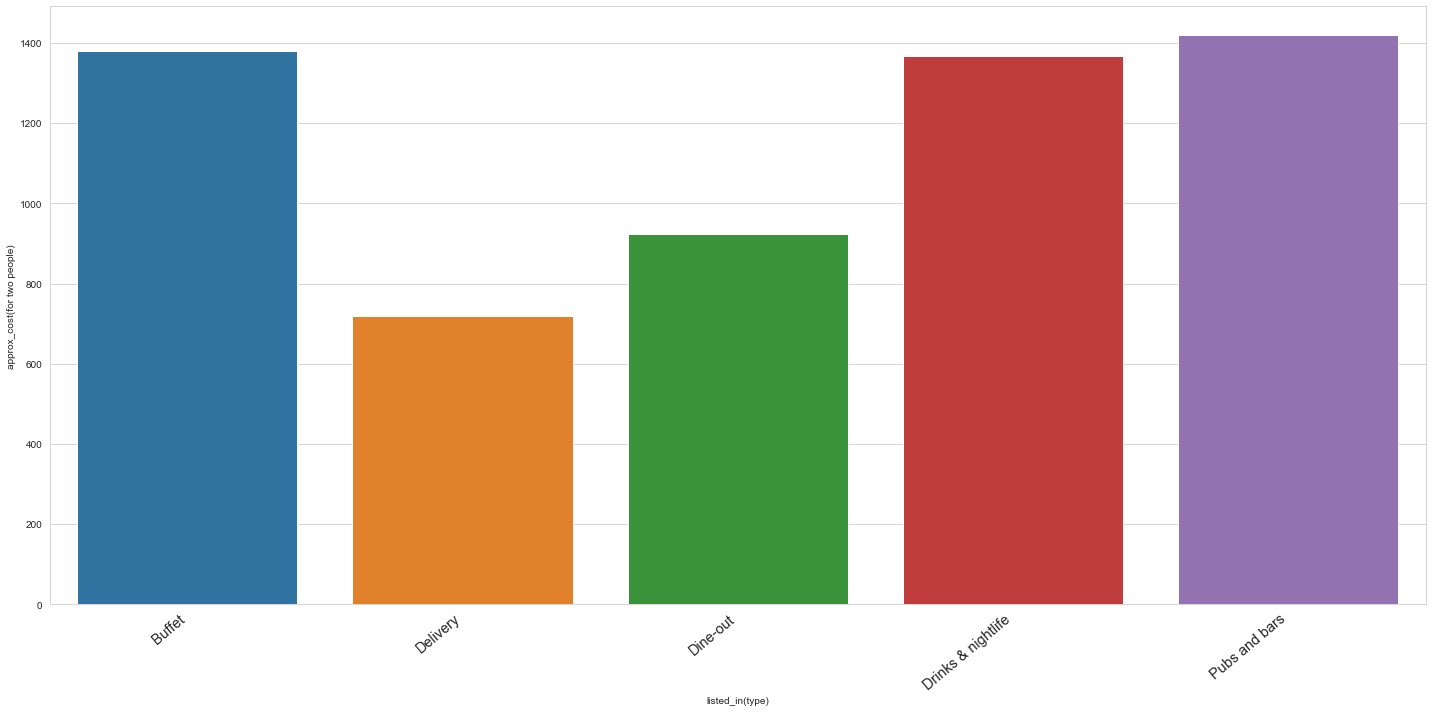

In [70]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="listed_in(type)",y="approx_cost(for two people)",data=chinese_group,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

**33)name of resturants have rating more than 4.5.**

In [58]:
rate_excellent=df[(df["rate"]>4.5)]

In [59]:
rate_excellent.groupby("name").mean().reset_index()

,name,rate,votes,approx_cost(for two people)
0,1131 Bar Kitchen,4.600000,2785.000000,1500.000000
1,ABs Absolute Barbecues,4.789474,4548.315789,1568.421053
2,Apsara Ice Cream,4.600000,206.000000,200.000000
3,Asia Kitchen By Mainland China,4.900000,2224.894737,1500.000000
4,Baar Union,4.600000,641.000000,850.000000
...,...,...,...,...
77,XO Belgian Waffle,4.600000,834.000000,400.000000
78,Yauatcha,4.600000,2353.666667,2800.000000
79,You Mee,4.700000,261.666667,2000.000000
80,Zamindar,4.600000,376.000000,800.000000


**34)rating for cuisines.**

In [134]:
cu=df.groupby("cuisines").mean().reset_index().iloc[1:31]

In [135]:
cu

,cuisines,rate,votes,approx_cost(for two people)
1,"African, Burger",4.590909,457.818182,1000.000000
2,"African, Burger, Desserts, Beverages, Fast Food",4.600000,595.000000,1000.000000
3,American,3.564286,49.642857,717.857143
4,"American, Asian, Continental, North Indian, So...",4.100000,326.666667,1200.000000
5,"American, Asian, European, North Indian",4.300000,3868.750000,1400.000000
6,"American, BBQ",4.500000,5276.583333,2500.000000
7,"American, Bakery, Beverages, Cafe, Healthy Foo...",3.700000,0.000000,300.000000
8,"American, Burger, Fast Food",4.207143,289.000000,400.000000
9,"American, Burger, Italian, Steak",3.900000,1338.000000,1700.000000
10,"American, Burger, Momos, Bengali",3.500000,9.000000,400.000000


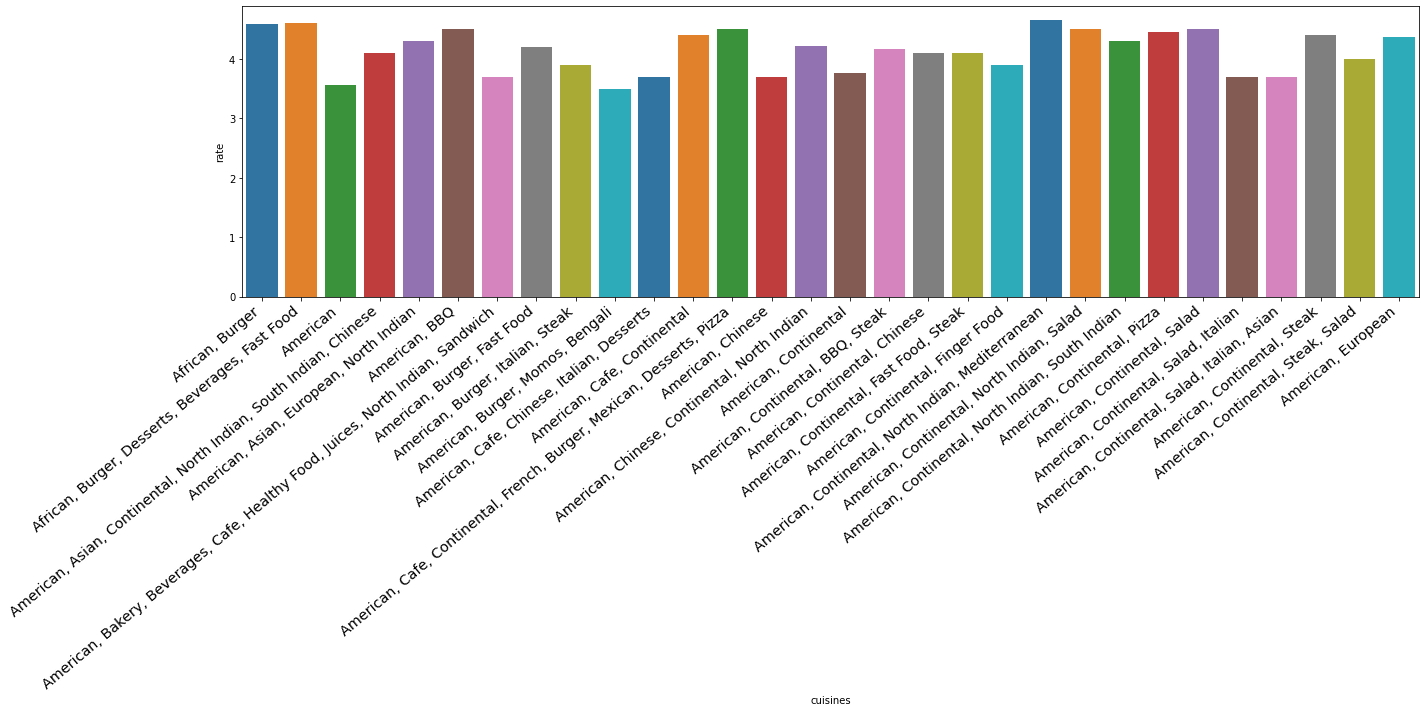

In [136]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="cuisines",y="rate",data=cu,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

In [139]:
dl=df.groupby("dish_liked").mean().reset_index().iloc[1:31]

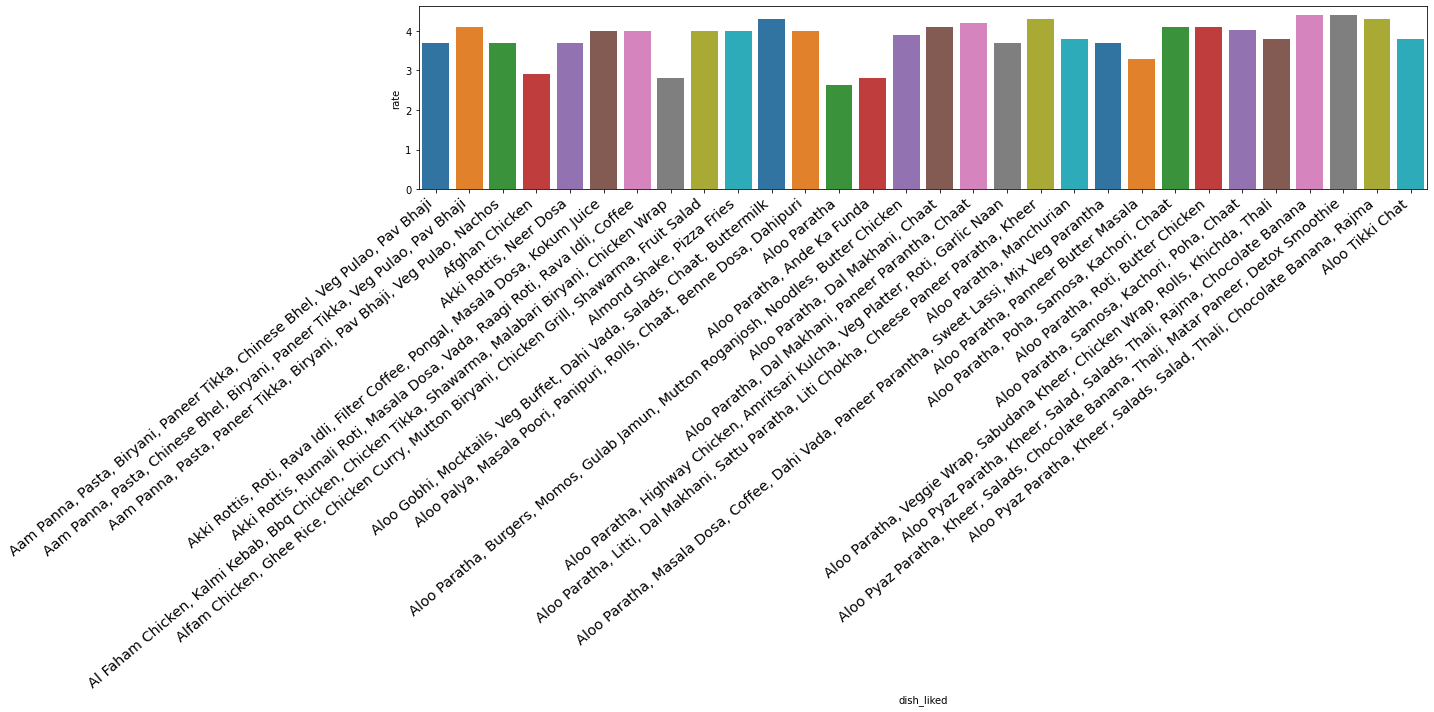

In [140]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="dish_liked",y="rate",data=dl,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()